In [1]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_id = '1kIXpkpjEmonYCn_VNw7a-2p1CflaAuoa'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(url, 'data.csv', quiet=False)

d_listing = pd.read_csv('data.csv')
d_listing.head(1)

Downloading...
From: https://drive.google.com/uc?export=download&id=1kIXpkpjEmonYCn_VNw7a-2p1CflaAuoa
To: /content/data.csv
100%|██████████| 16.9M/16.9M [00:00<00:00, 50.5MB/s]


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [3]:
file_id = '1X9a59SPipMZopcy2XJ7zvbfZNnjDnhtV'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(url, 'data.csv', quiet=False)

d_calender = pd.read_csv('data.csv')
d_calender.head()

Downloading...
From: https://drive.google.com/uc?export=download&id=1X9a59SPipMZopcy2XJ7zvbfZNnjDnhtV
To: /content/data.csv
100%|██████████| 36.7M/36.7M [00:00<00:00, 61.9MB/s]


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
d_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
d_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
# Misalnya df adalah dataframe kamu
missing_values = d_listing.isnull().sum()
print("Missing values per kolom:")
missing_values.sort_values(ascending=False).head(20)

Missing values per kolom:


,0
license,3818
square_feet,3721
monthly_price,2301
security_deposit,1952
weekly_price,1809
notes,1606
neighborhood_overview,1032
cleaning_fee,1030
transit,934
host_about,859


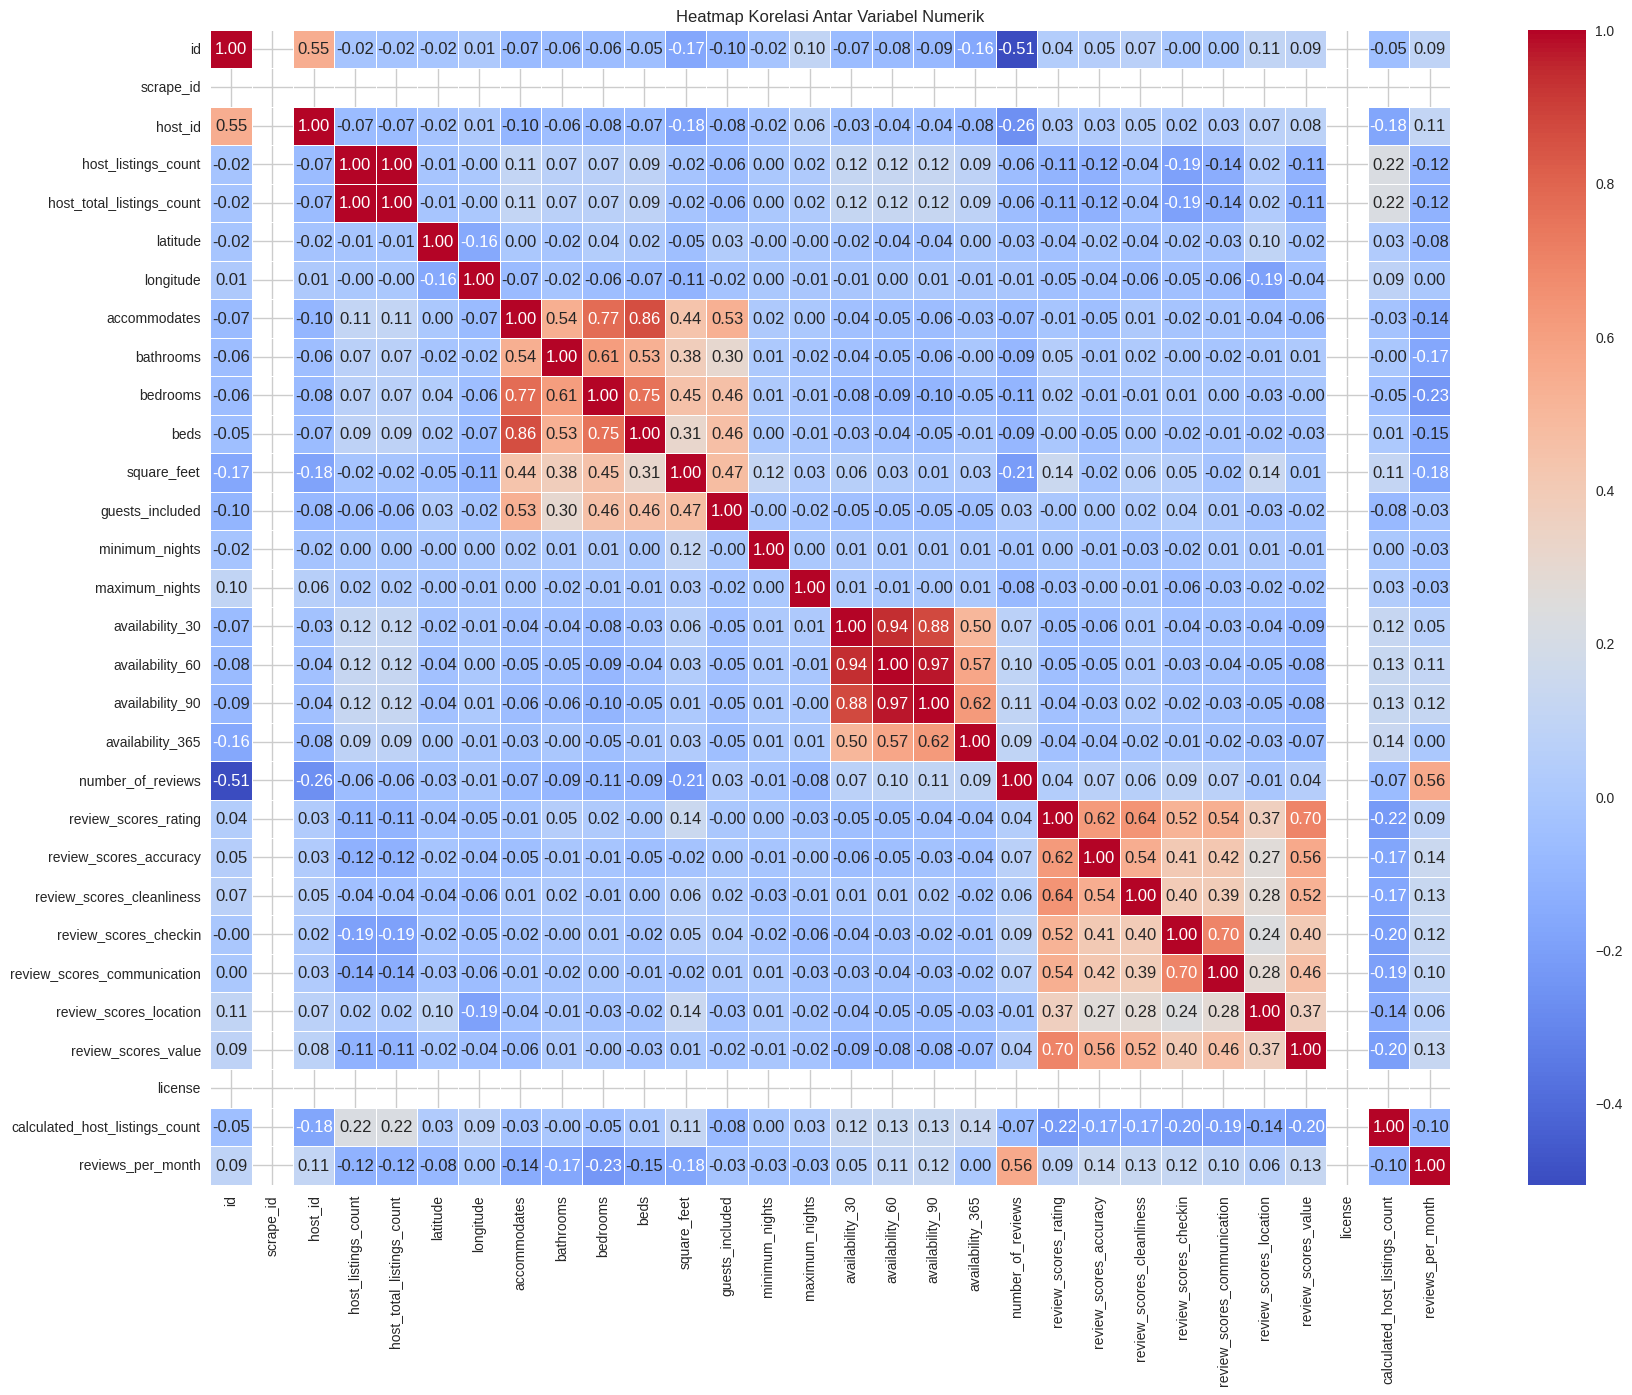

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik
numeric_data = d_listing.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Judul grafik
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [8]:
calendar_selected = d_calender[['listing_id', 'date', 'available', 'price']]
listings_selected = d_listing[['id', 'property_type', 'room_type', 'price', 'city', 'review_scores_rating', 'accommodates', 'bedrooms', 'beds', 'bed_type',
                               'latitude', 'longitude', 'host_is_superhost', 'neighbourhood_cleansed', 'bathrooms', 'availability_365', 'number_of_reviews',
                               'host_response_time', 'is_location_exact', 'instant_bookable', 'cancellation_policy', 'guests_included', 'host_total_listings_count', 'street',
                               'picture_url', 'name', 'listing_url']]

In [9]:
listings_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3818 non-null   int64  
 1   property_type              3817 non-null   object 
 2   room_type                  3818 non-null   object 
 3   price                      3818 non-null   object 
 4   city                       3818 non-null   object 
 5   review_scores_rating       3171 non-null   float64
 6   accommodates               3818 non-null   int64  
 7   bedrooms                   3812 non-null   float64
 8   beds                       3817 non-null   float64
 9   bed_type                   3818 non-null   object 
 10  latitude                   3818 non-null   float64
 11  longitude                  3818 non-null   float64
 12  host_is_superhost          3816 non-null   object 
 13  neighbourhood_cleansed     3818 non-null   objec

# EDA


In [10]:
# Membersihkan dan mengubah kolom price menjadi float
listings_selected['price'] = listings_selected['price'].replace('[\$,]', '', regex=True).astype(float)

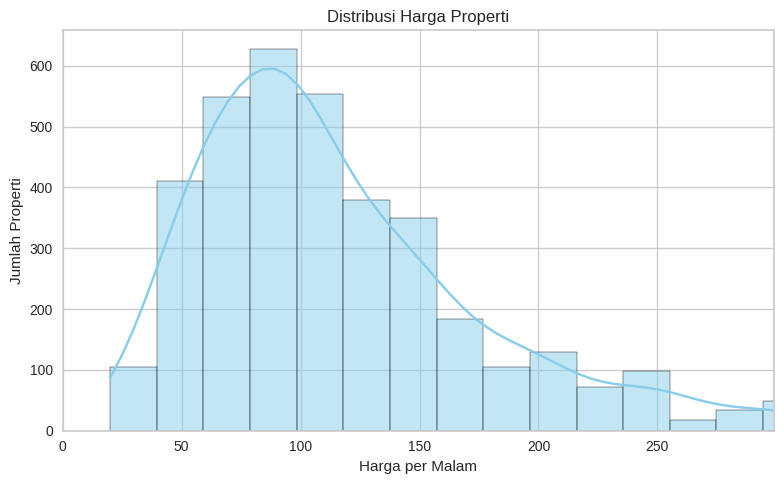

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=listings_selected, x='price', bins=50, kde=True, color='skyblue')
plt.title('Distribusi Harga Properti')
plt.xlabel('Harga per Malam')
plt.ylabel('Jumlah Properti')
plt.xlim(0, listings_selected['price'].quantile(0.95))  # fokus ke 95% data biar gak ketarik outlier
plt.tight_layout()
plt.show()

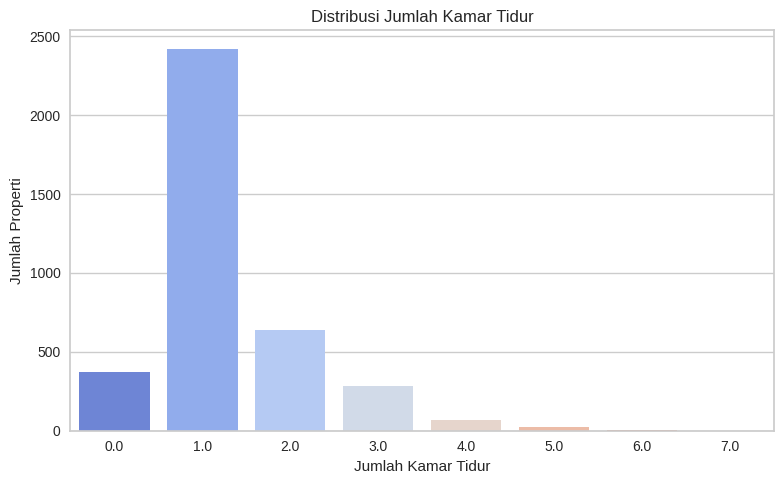

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=listings_selected, x='bedrooms', palette='coolwarm')
plt.title('Distribusi Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Jumlah Properti')
plt.tight_layout()
plt.show()

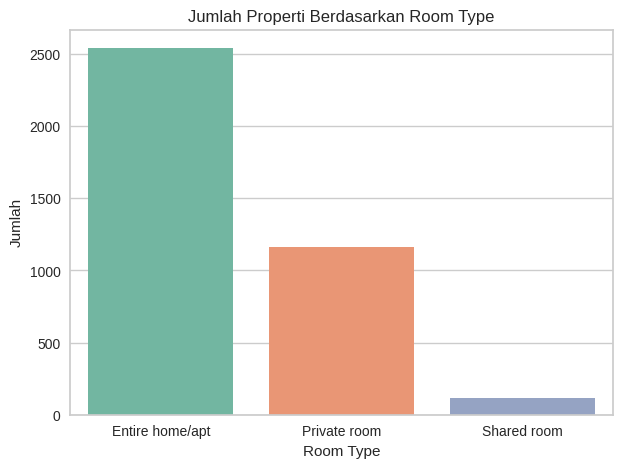

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(data=listings_selected, x='room_type', palette='Set2')
plt.title('Jumlah Properti Berdasarkan Room Type')
plt.xlabel('Room Type')
plt.ylabel('Jumlah')
plt.show()

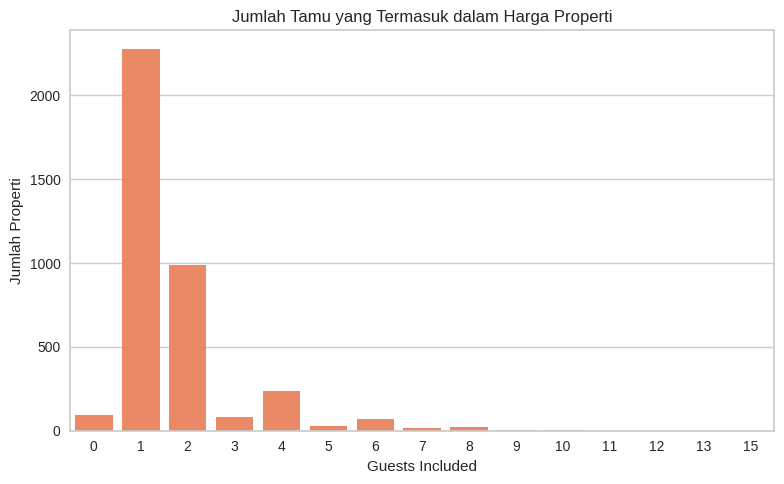

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=listings_selected, x='guests_included', color='coral')
plt.title('Jumlah Tamu yang Termasuk dalam Harga Properti')
plt.xlabel('Guests Included')
plt.ylabel('Jumlah Properti')
plt.tight_layout()
plt.show()

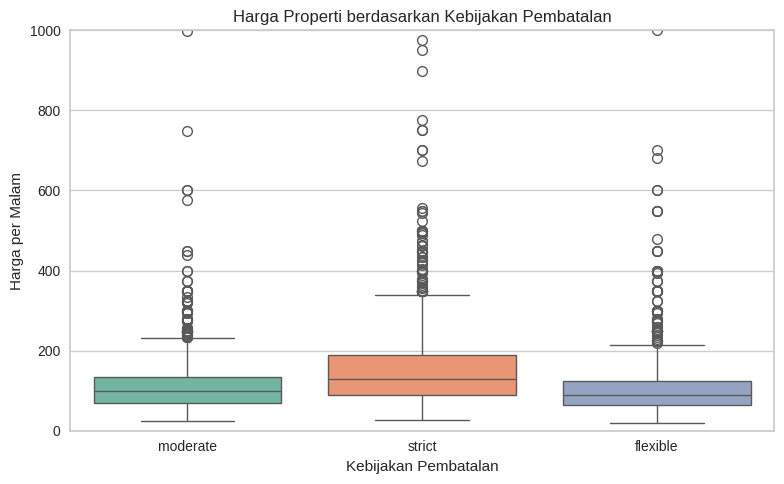

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=listings_selected,
    x='cancellation_policy',
    y='price',
    palette='Set2',
    showfliers=True  # tampilkan outlier
)
plt.ylim(0, listings_selected['price'].max())  # tampilkan sampai harga maksimum
plt.title('Harga Properti berdasarkan Kebijakan Pembatalan')
plt.xlabel('Kebijakan Pembatalan')
plt.ylabel('Harga per Malam')
plt.tight_layout()
plt.show()

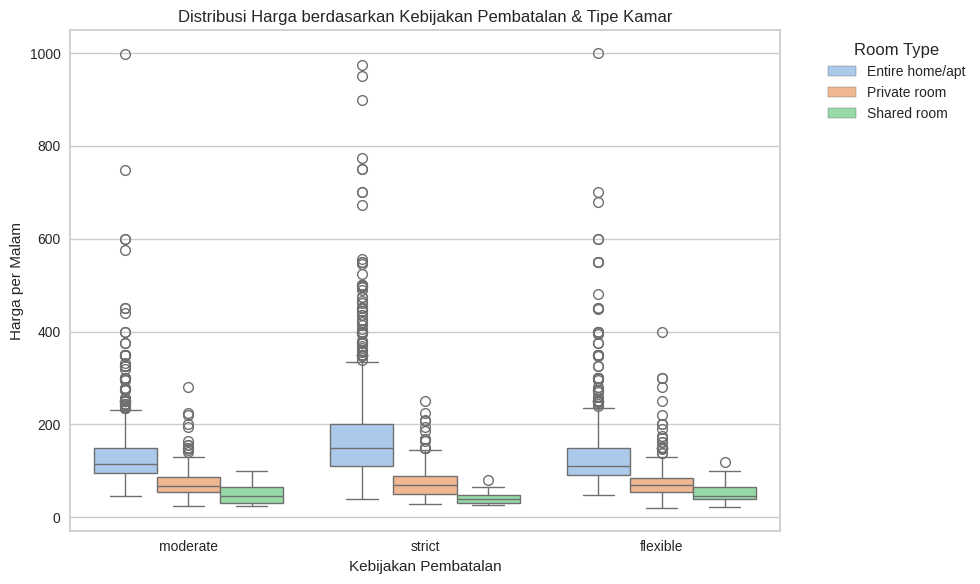

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=listings_selected,
    x='cancellation_policy',
    y='price',
    hue='room_type',
    palette='pastel',
    showfliers=True
)
plt.title('Distribusi Harga berdasarkan Kebijakan Pembatalan & Tipe Kamar')
plt.xlabel('Kebijakan Pembatalan')
plt.ylabel('Harga per Malam')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

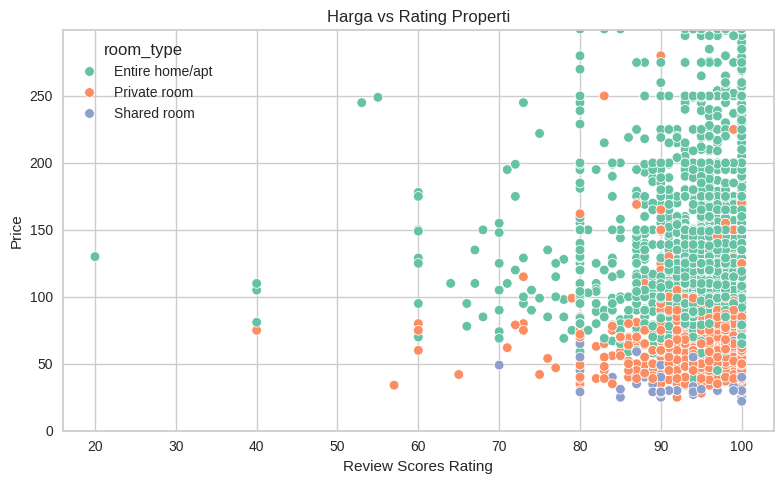

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=listings_selected, x='review_scores_rating', y='price', hue='room_type', palette='Set2')
plt.title('Harga vs Rating Properti')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.ylim(0, listings_selected['price'].quantile(0.95))  # biar lebih clean, limit outlier
plt.tight_layout()
plt.show()

# Handling Missing Value

In [18]:
listings_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3818 non-null   int64  
 1   property_type              3817 non-null   object 
 2   room_type                  3818 non-null   object 
 3   price                      3818 non-null   float64
 4   city                       3818 non-null   object 
 5   review_scores_rating       3171 non-null   float64
 6   accommodates               3818 non-null   int64  
 7   bedrooms                   3812 non-null   float64
 8   beds                       3817 non-null   float64
 9   bed_type                   3818 non-null   object 
 10  latitude                   3818 non-null   float64
 11  longitude                  3818 non-null   float64
 12  host_is_superhost          3816 non-null   object 
 13  neighbourhood_cleansed     3818 non-null   objec

In [19]:
# Misalnya df adalah dataframe kamu
missing_values = listings_selected.isnull().sum()
print("Missing values per kolom:")
missing_values.sort_values(ascending=False).head(20)

Missing values per kolom:


,0
review_scores_rating,647
host_response_time,523
bathrooms,16
bedrooms,6
host_is_superhost,2
host_total_listings_count,2
property_type,1
beds,1
id,0
room_type,0


In [20]:
calendar_selected['price'].fillna(0, inplace=True)
print(calendar_selected.isnull().sum())

listing_id    0
date          0
available     0
price         0
dtype: int64


In [21]:
listings_selected['review_scores_rating'].fillna(listings_selected['review_scores_rating'].median(), inplace=True)
listings_selected['host_is_superhost'].fillna(listings_selected['host_is_superhost'].mode()[0], inplace=True)
listings_selected['property_type'].fillna(listings_selected['property_type'].mode()[0], inplace=True)
listings_selected['bathrooms'].fillna(listings_selected['bathrooms'].median(), inplace=True)
listings_selected['bedrooms'].fillna(listings_selected['bedrooms'].median(), inplace=True)
listings_selected['beds'].fillna(listings_selected['beds'].median(), inplace=True)
listings_selected['host_response_time'].fillna(listings_selected['host_response_time'].mode()[0], inplace=True)
listings_selected['guests_included'].fillna(listings_selected['guests_included'].mode()[0], inplace=True)
listings_selected['host_total_listings_count'].fillna(listings_selected['host_total_listings_count'].median(), inplace=True)
listings_selected['cancellation_policy'].fillna(listings_selected['cancellation_policy'].mode()[0], inplace=True)

print(listings_selected.isnull().sum())

id                           0
property_type                0
room_type                    0
price                        0
city                         0
review_scores_rating         0
accommodates                 0
bedrooms                     0
beds                         0
bed_type                     0
latitude                     0
longitude                    0
host_is_superhost            0
neighbourhood_cleansed       0
bathrooms                    0
availability_365             0
number_of_reviews            0
host_response_time           0
is_location_exact            0
instant_bookable             0
cancellation_policy          0
guests_included              0
host_total_listings_count    0
street                       0
picture_url                  0
name                         0
listing_url                  0
dtype: int64


# Handling Inconsistency

In [22]:
listings_selected['price'] = listings_selected['price'].replace({'\$': '', ',': ''}, regex=True)
listings_selected['price'] = pd.to_numeric(listings_selected['price'], errors='coerce')
print(listings_selected['price'].head())

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64


In [23]:
for col in calendar_selected.select_dtypes(include=['object']).columns:
    calendar_selected[col] = calendar_selected[col].str.strip().str.title()

calendar_selected.head()

,listing_id,date,available,price
0,241032,2016-01-04,T,$85.00
1,241032,2016-01-05,T,$85.00
2,241032,2016-01-06,F,NaN
3,241032,2016-01-07,F,NaN
4,241032,2016-01-08,F,NaN


In [24]:
for col in listings_selected.select_dtypes(include=['object']).columns:
    listings_selected[col] = listings_selected[col].str.strip().str.title()

listings_selected.head

<bound method NDFrame.head of             id property_type        room_type  price     city  \
0       241032     Apartment  Entire Home/Apt   85.0  Seattle   
1       953595     Apartment  Entire Home/Apt  150.0  Seattle   
2      3308979         House  Entire Home/Apt  975.0  Seattle   
3      7421966     Apartment  Entire Home/Apt  100.0  Seattle   
4       278830         House  Entire Home/Apt  450.0  Seattle   
...        ...           ...              ...    ...      ...   
3813   8101950         House  Entire Home/Apt  359.0  Seattle   
3814   8902327     Apartment  Entire Home/Apt   79.0  Seattle   
3815  10267360         House  Entire Home/Apt   93.0  Seattle   
3816   9604740   Condominium  Entire Home/Apt   99.0  Seattle   
3817  10208623     Apartment  Entire Home/Apt   87.0  Seattle   

      review_scores_rating  accommodates  bedrooms  beds  bed_type  ...  \
0                     95.0             4       1.0   1.0  Real Bed  ...   
1                     96.0             4       1.0   1.0  Real Bed  ...   
2                     97.0            11       5.0   7.0  Real Bed  ...   
3                     96.0             3       0.0   2.0  Real Bed  ...   
4                     92.0             6       3.0   3.0  Real Bed  ...   
...                    ...           ...       ...   ...       ...  ...   
3813                  80.0             6       3.0   3.0  Real Bed  ...   
3814                 100.0             4       1.0   2.0  Real Bed  ...   
3815                  96.0             2       1.0   1.0  Real Bed  ...   
3816                  96.0             2       0.0   1.0  Real Bed  ...   
3817                  96.0             3       2.0   1.0  Real Bed  ...   

      host_response_time  is_location_exact instant_bookable  \
0     Within A Few Hours                  T                F   
1         Within An Hour                  T                F   
2     Within A Few Hours                  T                F   
3         Within An Hour                  T                F   
4         Within An Hour                  T                F   
...                  ...                ...              ...   
3813  Within A Few Hours                  T                F   
3814      Within An Hour                  T                F   
3815      Within An Hour                  F                F   
3816      Within An Hour                  F                F   
3817        Within A Day                  T                F   

     cancellation_policy  guests_included  host_total_listings_count  \
0               Moderate                2                        3.0   
1                 Strict                1                        6.0   
2                 Strict               10                        2.0   
3               Flexible                1                        1.0   
4                 Strict                6                        2.0   
...                  ...              ...                        ...   
3813              Strict                1                      354.0   
3814            Moderate                3                        1.0   
3815            Moderate                2                        1.0   
3816            Moderate                1                        1.0   
3817            Flexible                1                        1.0   

                                                 street  \
0         Gilman Dr W, Seattle, Wa 98119, United States   
1     7Th Avenue West, Seattle, Wa 98119, United States   
2     West Lee Street, Seattle, Wa 98119, United States   
3     8Th Avenue West, Seattle, Wa 98119, United States   
4          14Th Ave W, Seattle, Wa 98119, United States   
...                                                 ...   
3813  Northwest 48Th Street, Seattle, Wa 98107, Unit...   
3814  Fuhrman Avenue East, Seattle, Wa 98102, United...   
3815  South Laurel Street, Seattle, Wa 98178, United...   
3816  43Rd Avenue East, Seattle, Wa 98112, United St...   
3817 

# Handling Outlier

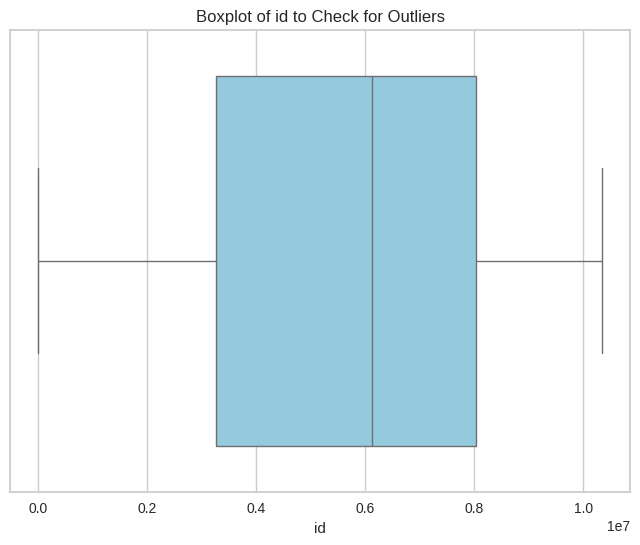

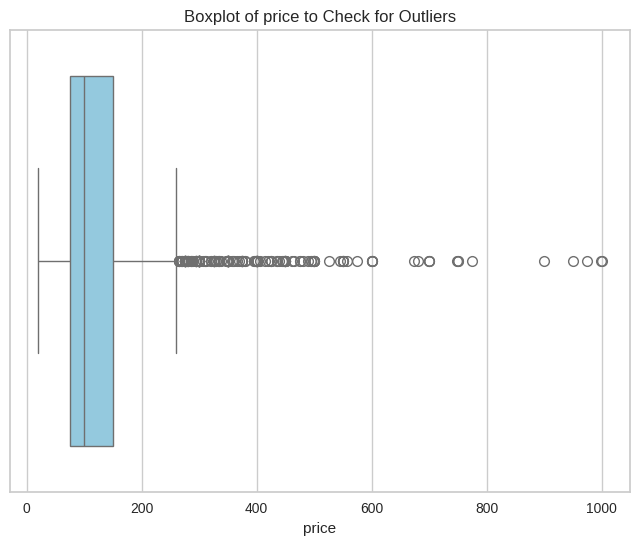

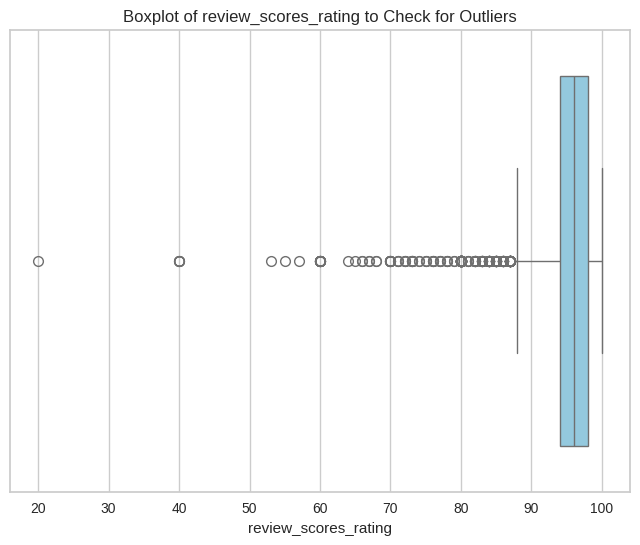

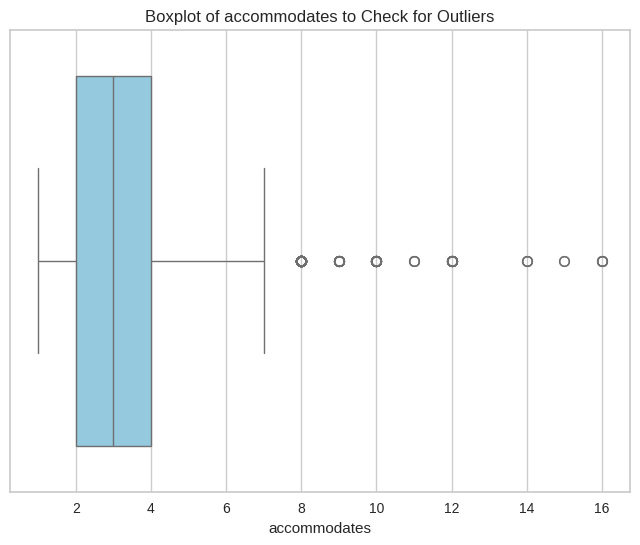

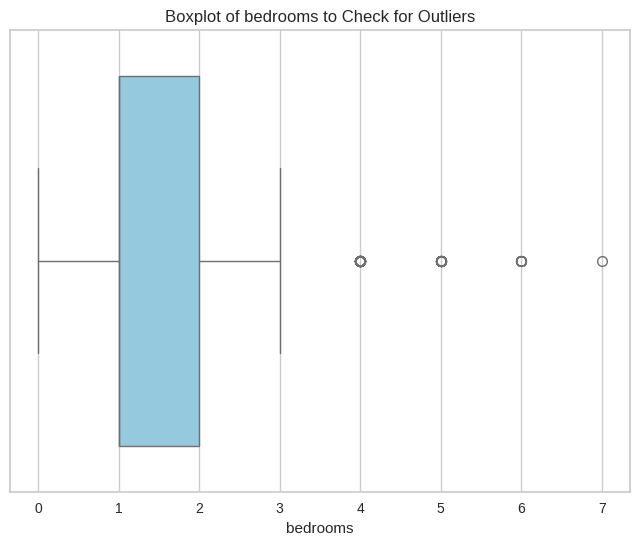

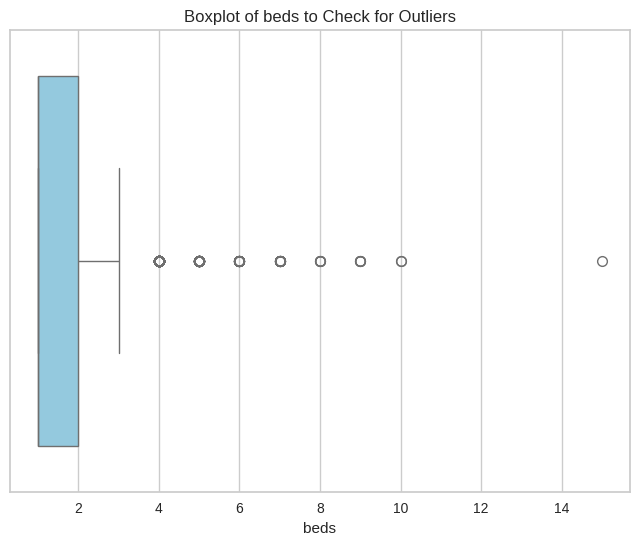

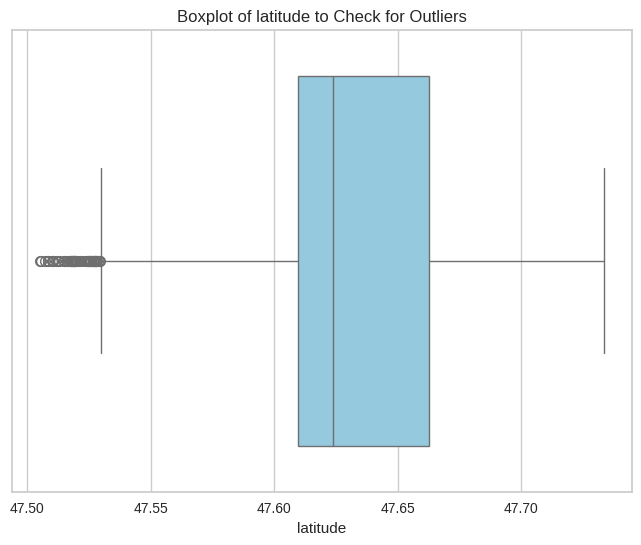

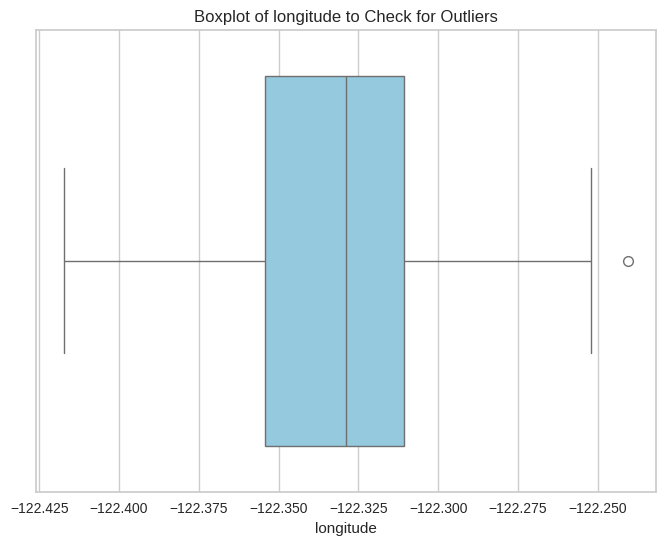

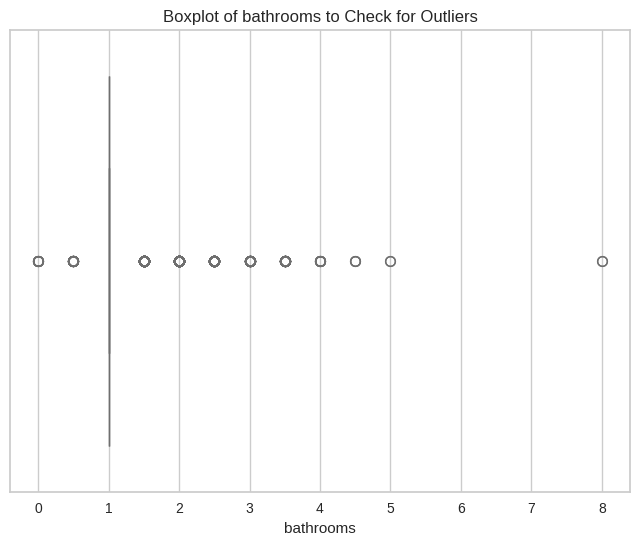

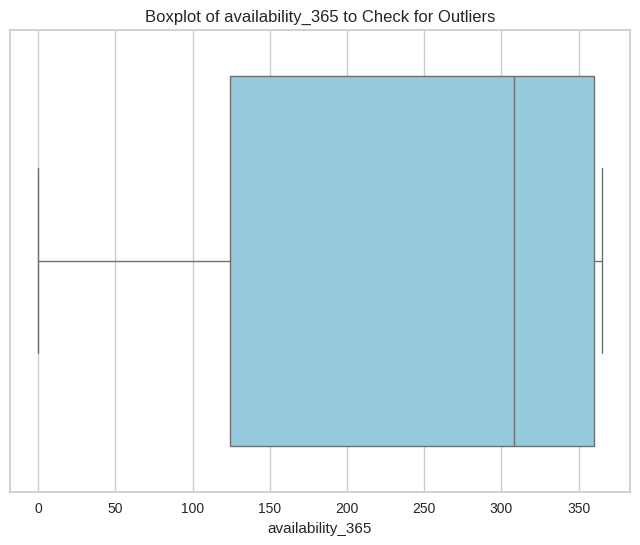

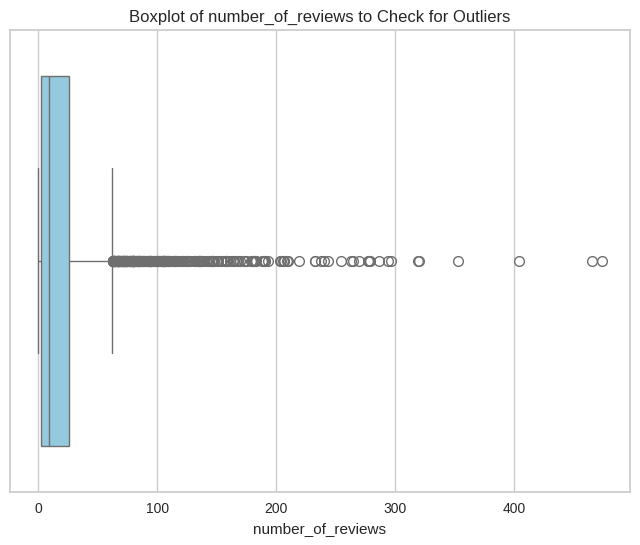

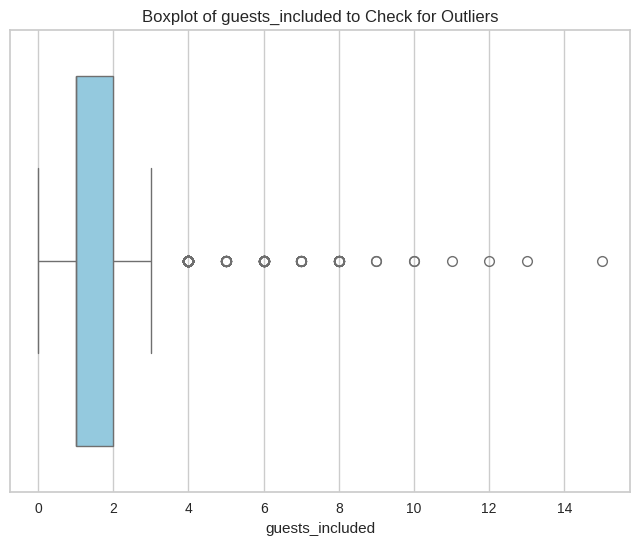

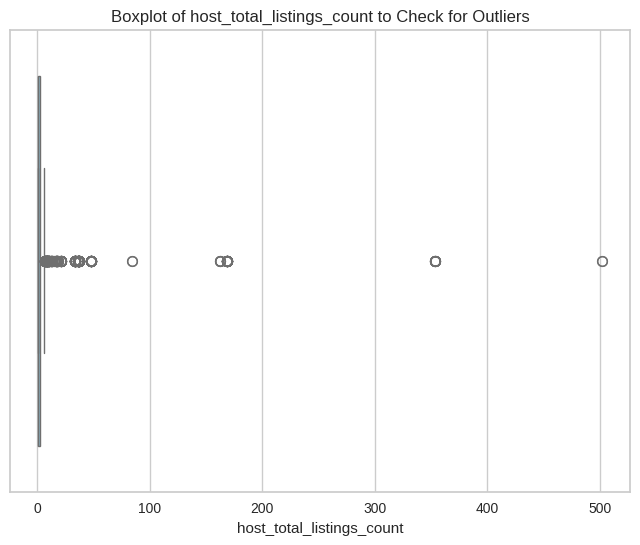

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk memvisualisasikan boxplot
def visualize_outliers(df, column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color="skyblue")
    plt.title(f"Boxplot of {column} to Check for Outliers")
    plt.xlabel(column)
    plt.show()

# Visualisasi before outliers handling
columns_to_handle = listings_selected.select_dtypes(include=['float64', 'int64']).columns

for column in columns_to_handle:
    visualize_outliers(listings_selected, column)  # Boxplot sebelum penanganan outlier

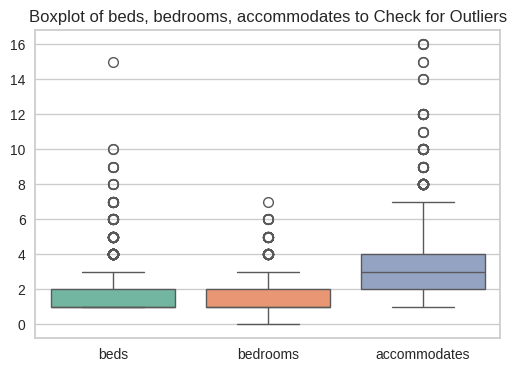

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk memvisualisasikan boxplot
def visualize_multiple_columns(df, columns):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[columns], palette="Set2")
    plt.title(f"Boxplot of {', '.join(columns)} to Check for Outliers")
    plt.show()

# Visualisasi before outliers handling untuk beberapa kolom sekaligus
columns_to_handle = ['beds', 'bedrooms', 'accommodates']  # Bisa sesuaikan dengan nama kolom yang kamu ingin visualisasikan

visualize_multiple_columns(listings_selected, columns_to_handle)  # Boxplot untuk kolom bed, bedroom, dan bathroom

In [27]:
import pandas as pd

# Fungsi untuk mendeteksi outlier
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identifikasi outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Daftar kolom numerik yang ingin diperiksa
columns_to_check = listings_selected.select_dtypes(include=['float64', 'int64']).columns

# Menyimpan jumlah outlier per kolom
outlier_counts = {}

# Menghitung jumlah outlier per kolom
for column in columns_to_check:
    outliers = detect_outliers(listings_selected, column)
    outlier_counts[column] = len(outliers)

# Menampilkan jumlah outlier per kolom
print(outlier_counts)

{'id': 0, 'price': 246, 'review_scores_rating': 326, 'accommodates': 184, 'bedrooms': 100, 'beds': 271, 'latitude': 75, 'longitude': 1, 'bathrooms': 920, 'availability_365': 0, 'number_of_reviews': 364, 'guests_included': 382, 'host_total_listings_count': 459}


In [28]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if not pd.isnull(x) else x)

In [29]:
# Daftar kolom numerik yang perlu ditangani
columns_to_handle = listings_selected.select_dtypes(include=['float64', 'int64']).columns

# Menangani outliers pada setiap kolom numerik
for column in columns_to_handle:
    handle_outliers(listings_selected, column)

# Cek hasilnya setelah penanganan outliers
print(listings_selected[columns_to_handle].describe())

                 id        price  review_scores_rating  accommodates  \
count  3.818000e+03  3818.000000           3818.000000   3818.000000   
mean   5.550111e+06   120.135935             95.506548      3.249869   
std    2.962660e+06    62.291150              3.710945      1.674105   
min    3.335000e+03    20.000000             88.000000      1.000000   
25%    3.258256e+06    75.000000             94.000000      2.000000   
50%    6.118244e+06   100.000000             96.000000      3.000000   
75%    8.035127e+06   150.000000             98.000000      4.000000   
max    1.034016e+07   262.500000            100.000000      7.000000   

          bedrooms         beds     latitude    longitude  bathrooms  \
count  3818.000000  3818.000000  3818.000000  3818.000000     3818.0   
mean      1.283918     1.643138    47.629137  -122.333105        1.0   
std       0.802999     0.850114     0.042615     0.031741        0.0   
min       0.000000     1.000000    47.529503  -122.417219      

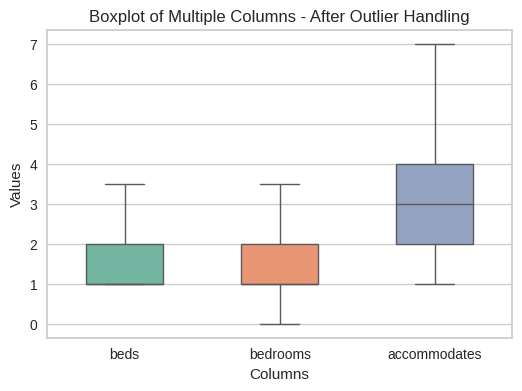

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk memvisualisasikan boxplot setelah penanganan outlier untuk beberapa kolom
def visualize_multiple_outliers_after(df, columns):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[columns], palette="Set2", width=0.5)
    plt.title("Boxplot of Multiple Columns - After Outlier Handling")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.show()

# Kolom yang akan divisualisasikan setelah penanganan outlier
columns_to_visualize = ['beds', 'bedrooms', 'accommodates']  # Sesuaikan dengan kolom yang ingin kamu visualisasikan

# Visualisasi setelah penanganan outlier untuk beberapa kolom
visualize_multiple_outliers_after(listings_selected, columns_to_visualize)


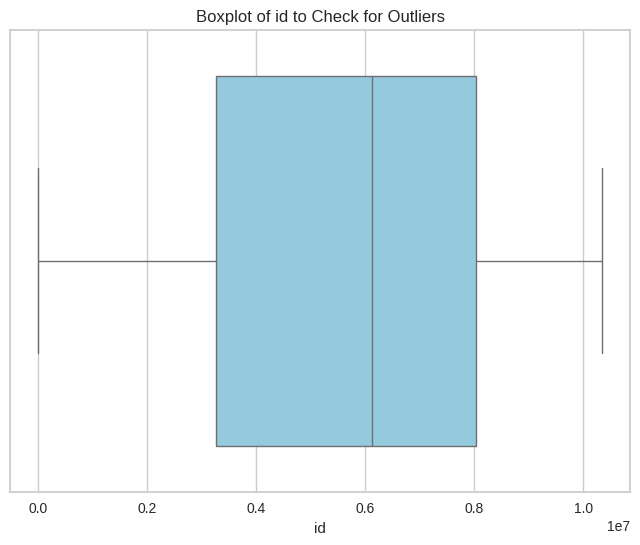

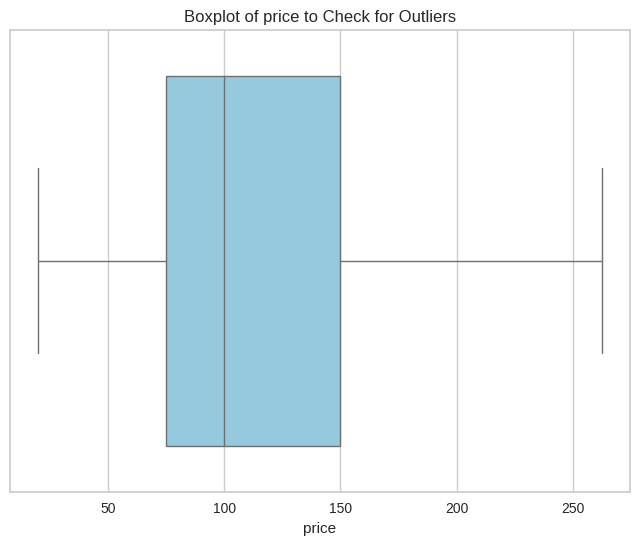

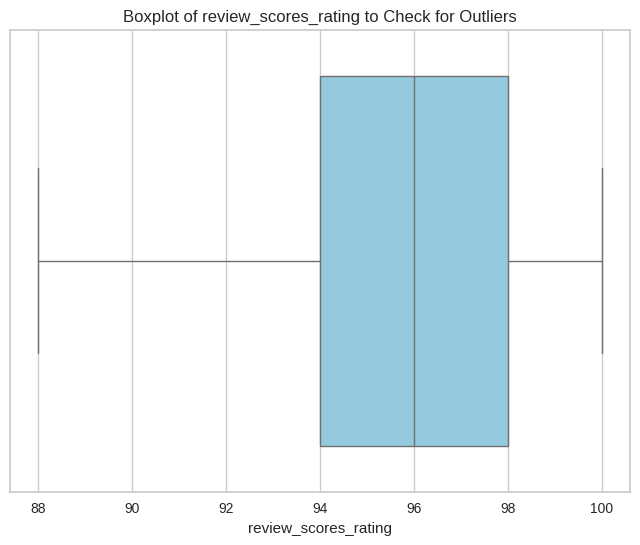

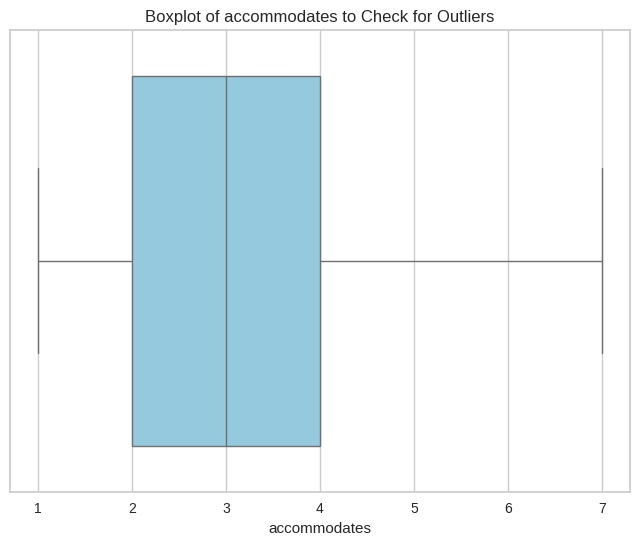

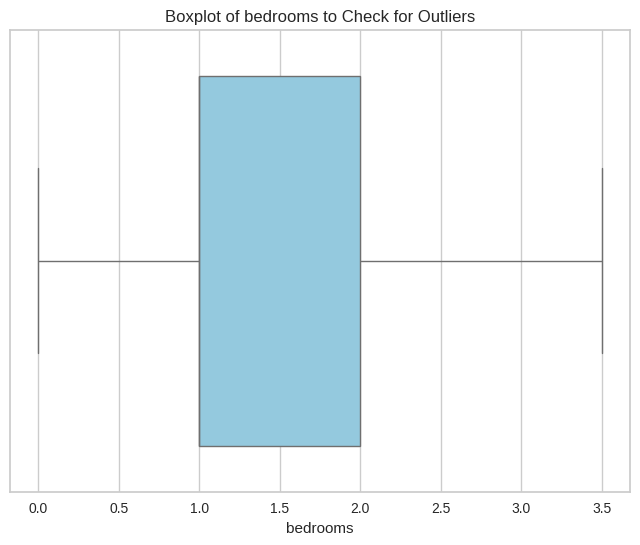

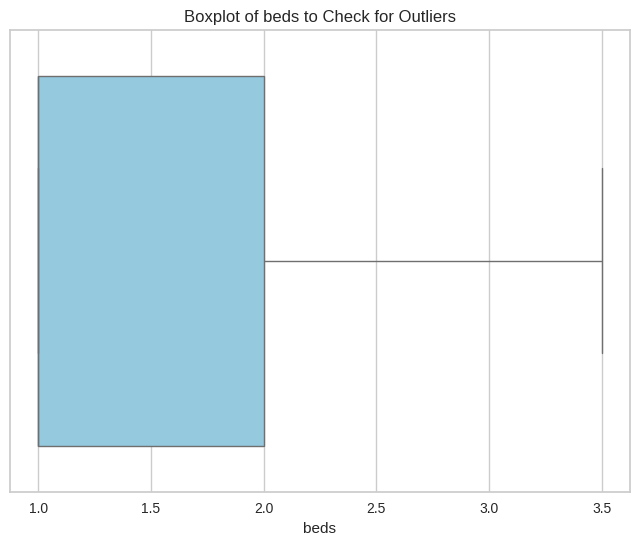

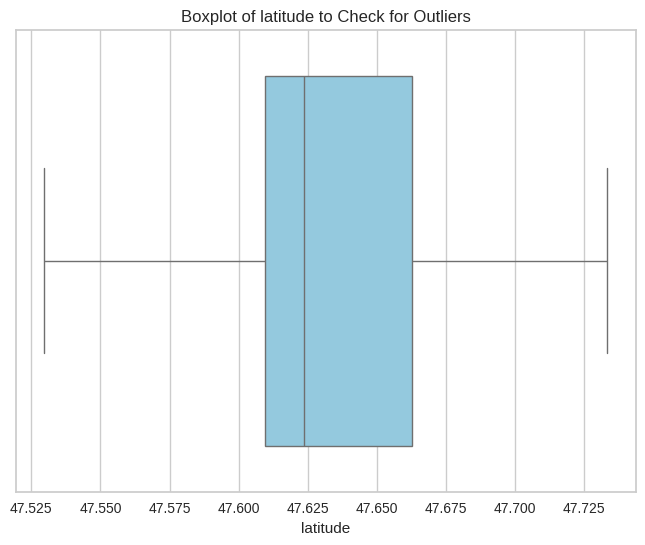

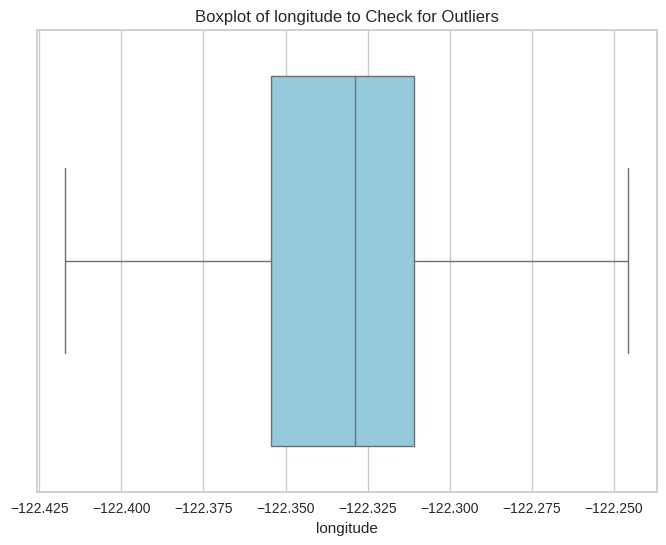

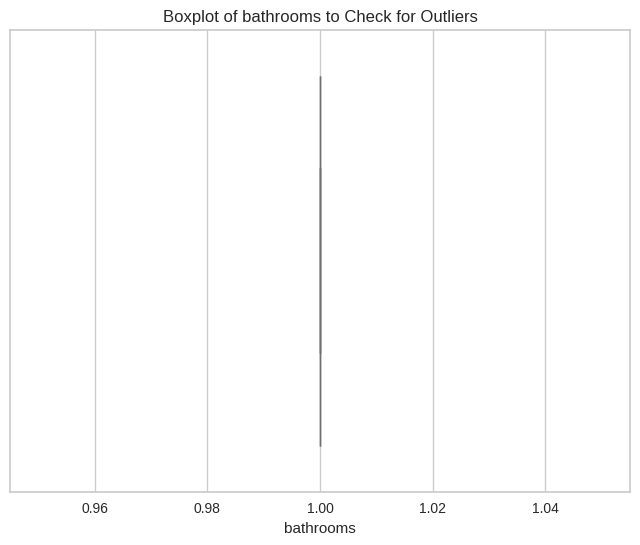

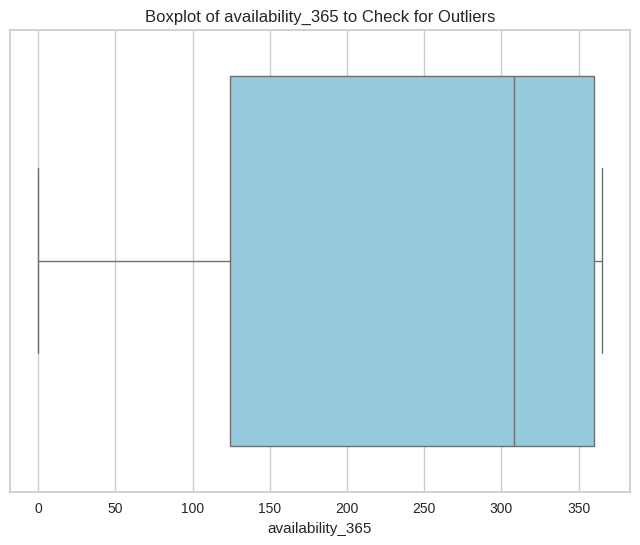

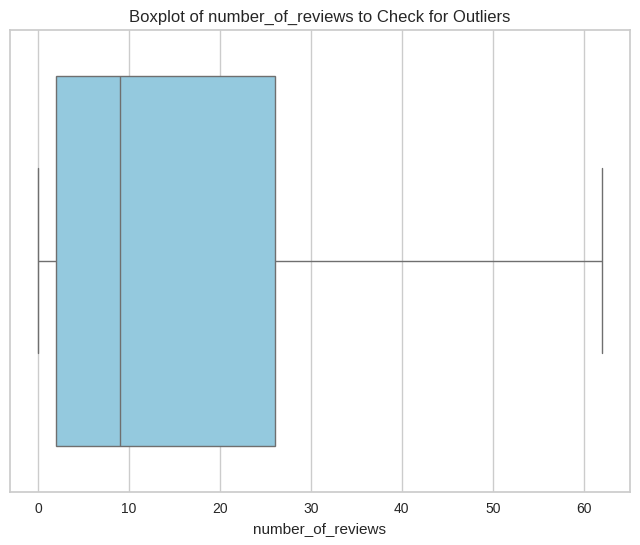

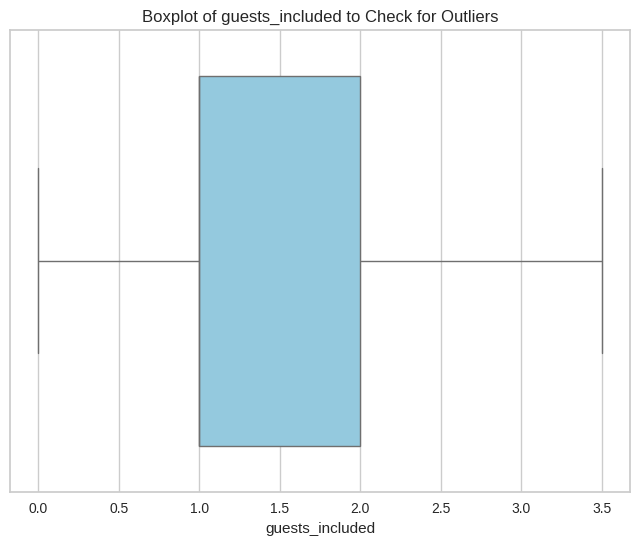

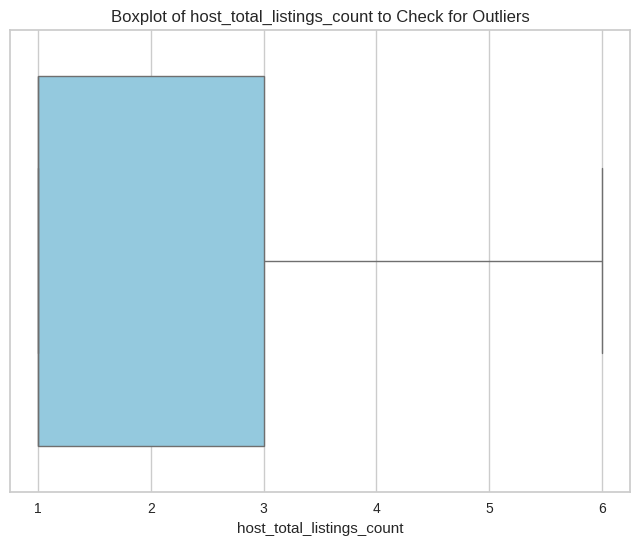

In [31]:
# Visualisasi after outliers handling
for column in columns_to_handle:
    visualize_outliers(listings_selected, column)  # Boxplot setelah penanganan outlier

# Feature Engginering

In [32]:
import numpy as np
import pandas as pd

# Membuat dictionary untuk menyesuaikan nama kota yang ada pada dataset
city_mapping = {
    'Seattle': 'Seattle',
    'Phinney Ridge Seattle': 'Seattle',
    'West Seattle': 'Seattle',
    'Ballard, Seattle': 'Seattle',
    '西雅图': 'Seattle',  # 'Xīyátú' untuk Seattle dalam Mandarin
    # Jika ada nama kota lain dalam bahasa atau format berbeda, bisa ditambahkan di sini
}

# Mengganti nama kota di kolom 'city' dengan nama kota yang konsisten
listings_selected['city_normalized'] = listings_selected['city'].map(city_mapping).fillna(listings_selected['city'])

# Memeriksa nilai unik pada kolom 'city' untuk memverifikasi semua nama kota yang perlu dipetakan
print("Unique cities in the original 'city' column:")
print(listings_selected['city'].unique())

# Memeriksa nilai-nilai yang terdeteksi sebagai 'NaN' pada 'city_normalized'
print("Cities with 'NaN' in 'city_normalized' after mapping:")
print(listings_selected[listings_selected['city_normalized'].isna()]['city'].unique())

# Koordinat pusat kota untuk beberapa kota (contoh: Seattle)
city_coordinates = {
    'Seattle': (47.6062, -122.3321),  # Koordinat pusat kota Seattle
    # Tambahkan koordinat untuk kota lain jika ada dalam dataset
}

# Menambah koordinat untuk kota yang belum ada di city_coordinates
city_coordinates.update({
    'New York': (40.7128, -74.0060),
    'Los Angeles': (34.0522, -118.2437),
    # Tambahkan kota lainnya jika diperlukan
})

# Fungsi untuk mendapatkan koordinat kota
def get_city_coordinates(city_name):
    return city_coordinates.get(city_name, (None, None))

# Menambahkan kolom untuk latitude dan longitude pusat kota
listings_selected['city_lat'], listings_selected['city_lon'] = zip(*listings_selected['city_normalized'].apply(get_city_coordinates))

# Menghitung jarak ke pusat kota yang sesuai berdasarkan koordinat kota dan properti
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius bumi dalam kilometer
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Jarak dalam kilometer

# Menghitung jarak ke pusat kota yang sesuai berdasarkan koordinat kota dan properti
listings_selected['distance_to_city'] = listings_selected.apply(
    lambda x: haversine(x['latitude'], x['longitude'], x['city_lat'], x['city_lon']) if x['city_lat'] and x['city_lon'] else None, axis=1
)

# Menampilkan hasil jarak ke pusat kota
print("Sample of the dataframe with calculated distance to city:")
#print(listings_selected[['listing_id', 'city_normalized', 'latitude', 'longitude', 'distance_to_city']].head())

Unique cities in the original 'city' column:
['Seattle' 'Ballard, Seattle' 'West Seattle' '西雅图' 'Phinney Ridge Seattle']
Cities with 'NaN' in 'city_normalized' after mapping:
[]
Sample of the dataframe with calculated distance to city:


# Clustering Listing Data

In [33]:
listings_selected_copy = listings_selected.copy()
listings_selected_copy.drop(['id','latitude','longitude','neighbourhood_cleansed', 'city_lat', 'city_lon', 'city_normalized'],axis=1, inplace=True)
listings_selected_copy

,property_type,room_type,price,city,review_scores_rating,accommodates,bedrooms,beds,bed_type,host_is_superhost,...,is_location_exact,instant_bookable,cancellation_policy,guests_included,host_total_listings_count,street,picture_url,name,listing_url,distance_to_city
0,Apartment,Entire Home/Apt,85.0,Seattle,95.0,4.0,1.0,1.0,Real Bed,F,...,T,F,Moderate,2.0,3.0,"Gilman Dr W, Seattle, Wa 98119, United States",Https://A1.Muscache.Com/Ac/Pictures/67560560/C...,Stylish Queen Anne Apartment,Https://Www.Airbnb.Com/Rooms/241032,4.439052
1,Apartment,Entire Home/Apt,150.0,Seattle,96.0,4.0,1.0,1.0,Real Bed,T,...,T,F,Strict,1.0,6.0,"7Th Avenue West, Seattle, Wa 98119, United States",Https://A0.Muscache.Com/Ac/Pictures/14409893/F...,Bright & Airy Queen Anne Apartment,Https://Www.Airbnb.Com/Rooms/953595,4.441933
2,House,Entire Home/Apt,262.5,Seattle,97.0,7.0,3.5,3.5,Real Bed,F,...,T,F,Strict,3.5,2.0,"West Lee Street, Seattle, Wa 98119, United States",Https://A2.Muscache.Com/Ac/Pictures/B4324E0F-A...,New Modern House-Amazing Water View,Https://Www.Airbnb.Com/Rooms/3308979,3.833194
3,Apartment,Entire Home/Apt,100.0,Seattle,96.0,3.0,0.0,2.0,Real Bed,F,...,T,F,Flexible,1.0,1.0,"8Th Avenue West, Seattle, Wa 98119, United States",Https://A0.Muscache.Com/Ac/Pictures/94146944/6...,Queen Anne Chateau,Https://Www.Airbnb.Com/Rooms/7421966,4.543407
4,House,Entire Home/Apt,262.5,Seattle,92.0,6.0,3.0,3.0,Real Bed,F,...,T,F,Strict,3.5,2.0,"14Th Ave W, Seattle, Wa 98119, United States",Https://A1.Muscache.Com/Ac/Pictures/6120468/B0...,Charming Craftsman 3 Bdm House,Https://Www.Airbnb.Com/Rooms/278830,4.240533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,House,Entire Home/Apt,262.5,Seattle,88.0,6.0,3.0,3.0,Real Bed,F,...,T,F,Strict,1.0,6.0,"Northwest 48Th Street, Seattle, Wa 98107, Unit...",Https://A2.Muscache.Com/Ac/Pictures/103217071/...,3Br Mountain View House In Seattle,Https://Www.Airbnb.Com/Rooms/8101950,6.770782
3814,Apartment,Entire Home/Apt,79.0,Seattle,100.0,4.0,1.0,2.0,Real Bed,F,...,T,F,Moderate,3.0,1.0,"Fuhrman Avenue East, Seattle, Wa 98102, United...",Https://A2.Muscache.Com/Ac/Pictures/626D4B1F-6...,Portage Bay View!-One Bedroom Apt,Https://Www.Airbnb.Com/Rooms/8902327,4.930030
3815,House,Entire Home/Apt,93.0,Seattle,96.0,2.0,1.0,1.0,Real Bed,F,...,F,F,Moderate,2.0,1.0,"South Laurel Street, Seattle, Wa 98178, United...",Https://A2.Muscache.Com/Ac/Pictures/A5974F04-2...,Private Apartment View Of Lake Wa,Https://Www.Airbnb.Com/Rooms/10267360,10.720376
3816,Condominium,Entire Home/Apt,99.0,Seattle,96.0,2.0,0.0,1.0,Real Bed,F,...,F,F,Moderate,1.0,1.0,"43Rd Avenue East, Seattle, Wa 98112, United St...",Https://A2.Muscache.Com/Ac/Pictures/202E4Ad6-B...,Amazing View With Modern Comfort!,Https://Www.Airbnb.Com/Rooms/9604740,5.140297


In [34]:
listings_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_type              3818 non-null   object 
 1   room_type                  3818 non-null   object 
 2   price                      3818 non-null   float64
 3   city                       3818 non-null   object 
 4   review_scores_rating       3818 non-null   float64
 5   accommodates               3818 non-null   float64
 6   bedrooms                   3818 non-null   float64
 7   beds                       3818 non-null   float64
 8   bed_type                   3818 non-null   object 
 9   host_is_superhost          3818 non-null   object 
 10  bathrooms                  3818 non-null   float64
 11  availability_365           3818 non-null   int64  
 12  number_of_reviews          3818 non-null   float64
 13  host_response_time         3818 non-null   objec

In [35]:
# Mapping untuk 'host_is_superhost'
superhost_mapping = {'T': 1, 'F': 0}
listings_selected_copy['host_is_superhost'] = listings_selected_copy['host_is_superhost'].map(superhost_mapping)

# Mapping untuk 'is_location_exact'
location_exact_mapping = {'T': 1, 'F': 0}
listings_selected_copy['is_location_exact'] = listings_selected_copy['is_location_exact'].map(location_exact_mapping)

# Mapping untuk 'instant_bookable'
instant_bookable_mapping = {'T': 1, 'F': 0}
listings_selected_copy['instant_bookable'] = listings_selected_copy['instant_bookable'].map(instant_bookable_mapping)


In [36]:
# Menghitung statistik (mean, std, median) berdasarkan property_type dan price
property_stats = listings_selected_copy.groupby('property_type')['price'].agg(['mean', 'max', 'median'])
#property_stats = listings_selected_copy.groupby('property_type')['price_x'].agg(['mean', 'std', 'median'])

# Mengubah nama kolom untuk memperjelas arti statistik yang dihitung
property_stats.columns = ['mean_property_type', 'max_property_type', 'median_property_type']

# Menampilkan hasil statistik untuk property_type dengan nama kolom yang jelas
print(property_stats)

# Melakukan merge untuk menambahkan kolom mean, std, dan median ke listings_selected_copy
listings_selected_copy = listings_selected_copy.merge(property_stats, on='property_type', how='left')

                 mean_property_type  max_property_type  median_property_type
property_type                                                               
Apartment                119.746780              262.5                 110.0
Bed & Breakfast          111.067568              262.5                  99.0
Boat                     166.125000              262.5                 150.0
Bungalow                 108.961538              262.5                  95.0
Cabin                    102.880952              262.5                  95.0
Camper/Rv                111.615385              262.5                  82.0
Chalet                    98.500000              135.0                  98.5
Condominium              136.307692              262.5                 115.0
Dorm                      39.500000               41.0                  39.5
House                    120.404268              262.5                  95.0
Loft                     129.262500              262.5                 102.5

In [37]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom 'cancellation_policy'
listings_selected_copy['cancellation_policy_encoded'] = label_encoder.fit_transform(listings_selected_copy['cancellation_policy']) + 1

# Menampilkan hasil encoding
print(listings_selected_copy[['cancellation_policy', 'cancellation_policy_encoded']].head())

  cancellation_policy  cancellation_policy_encoded
0            Moderate                            2
1              Strict                            3
2              Strict                            3
3            Flexible                            1
4              Strict                            3


In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
listings_selected_copy['room_type_encoded'] = label_encoder.fit_transform(listings_selected_copy['room_type']) + 1
label_mapping = {category: code + 1 for category, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
print(label_mapping)
print(listings_selected_copy[['room_type', 'room_type_encoded']].head())

{'Entire Home/Apt': np.int64(1), 'Private Room': np.int64(2), 'Shared Room': np.int64(3)}
         room_type  room_type_encoded
0  Entire Home/Apt                  1
1  Entire Home/Apt                  1
2  Entire Home/Apt                  1
3  Entire Home/Apt                  1
4  Entire Home/Apt                  1


In [39]:
listings_selected_copy.drop(['property_type', 'review_scores_rating','host_response_time','bed_type', 'cancellation_policy'],axis=1, inplace=True)

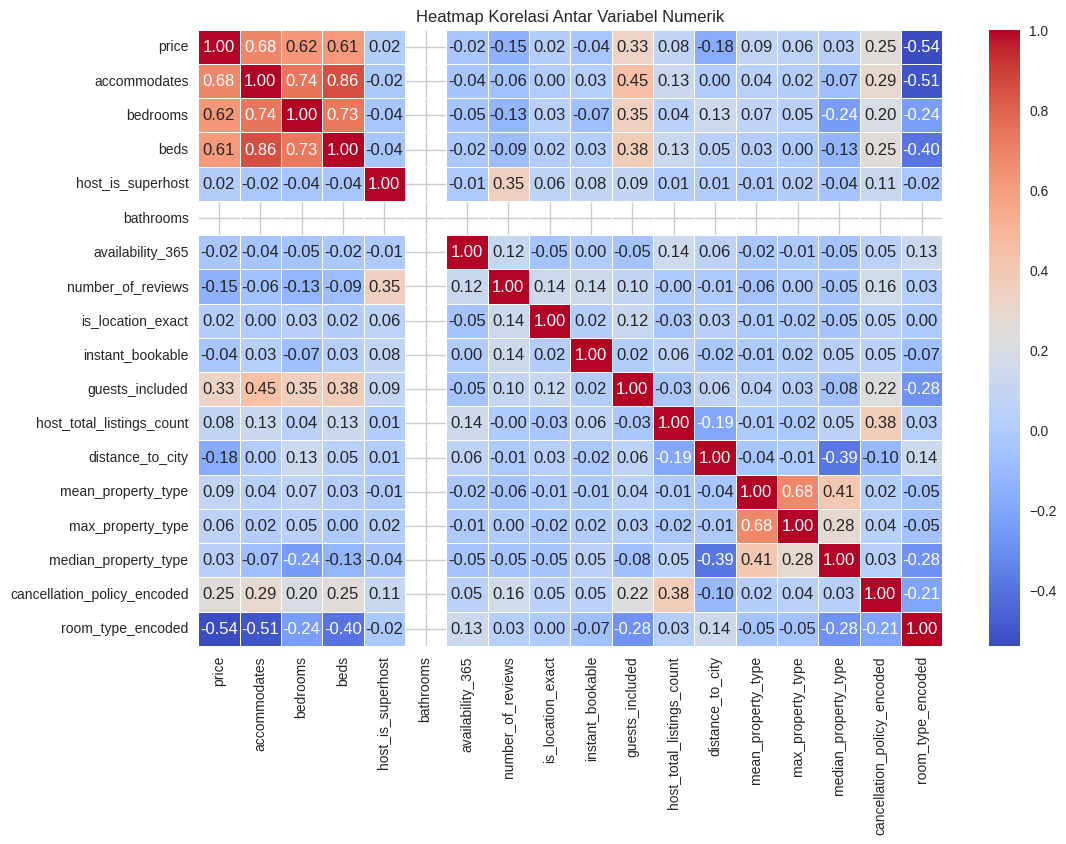

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik
numeric_data = listings_selected_copy.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Judul grafik
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [41]:
# Versi kedua: Menghapus semua kolom yang tidak diperlukan
columns_to_drop = ['is_location_exact', 'instant_bookable', 'availability_365']
listings_selected_copy = listings_selected_copy.drop(columns=columns_to_drop, axis=1)

In [42]:
listings_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    3818 non-null   object 
 1   price                        3818 non-null   float64
 2   city                         3818 non-null   object 
 3   accommodates                 3818 non-null   float64
 4   bedrooms                     3818 non-null   float64
 5   beds                         3818 non-null   float64
 6   host_is_superhost            3818 non-null   int64  
 7   bathrooms                    3818 non-null   float64
 8   number_of_reviews            3818 non-null   float64
 9   guests_included              3818 non-null   float64
 10  host_total_listings_count    3818 non-null   float64
 11  street                       3818 non-null   object 
 12  picture_url                  3818 non-null   object 
 13  name              

In [43]:
# Pilih hanya kolom yang diinginkan
#selected_columns = ['price', 'accommodates', 'bedrooms', 'beds', 'guests_included', 'room_type_encoded','city', 'street', 'picture_url', 'name', 'listing_url', 'review_scores_rating', 'bathrooms', 'room_type']

# Buat DataFrame baru yang hanya berisi kolom yang dipilih
#listings_selected_copy_streamlit = listings_selected_copy[selected_columns]

In [44]:
# Pilih hanya 6 variabel yang diinginkan
selected_columns = ['price', 'accommodates', 'bedrooms', 'beds', 'guests_included', 'room_type_encoded']

# Buat DataFrame baru yang hanya berisi 6 kolom yang dipilih
listings_selected_copy = listings_selected_copy[selected_columns]

# Menampilkan informasi dari DataFrame yang baru
listings_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              3818 non-null   float64
 1   accommodates       3818 non-null   float64
 2   bedrooms           3818 non-null   float64
 3   beds               3818 non-null   float64
 4   guests_included    3818 non-null   float64
 5   room_type_encoded  3818 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.1 KB


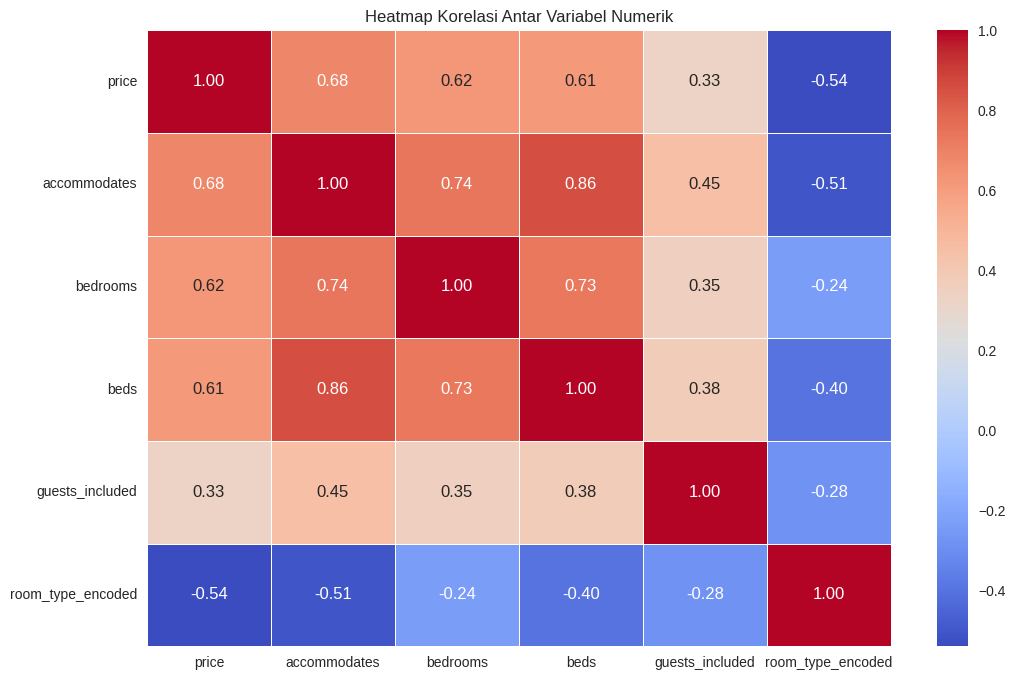

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik
numeric_data = listings_selected_copy.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Judul grafik
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Pilih semua kolom numerik secara otomatis
numeric_features = listings_selected_copy.select_dtypes(include=['number']).columns.tolist()

# Menyiapkan transformer untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Pipeline akhir
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['price', 'accommodates',
                                                   'bedrooms', 'beds',
                                                   'guests_included',
                                                   'room_type_encoded'])]))])

In [47]:
# Pipeline untuk preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit dan transform data
transformed_data = pipeline.fit_transform(listings_selected_copy)

# Ambil nama fitur baru setelah transformasi
feature_names = pipeline.named_steps['preprocessor'].named_transformers_['num'].get_feature_names_out(numeric_features)

# Konversi hasil menjadi DataFrame dan beri nama fitur
transformed_data = pd.DataFrame(transformed_data, columns=feature_names)

# Jika kolom tidak ada dalam 'numeric_feature', konversi tipe data ke integer
for col in transformed_data.columns:
    if col not in numeric_features:  # Pastikan kolom yang tidak ada di 'numeric_features' dikonversi
        transformed_data[col] = transformed_data[col].astype(int)

In [48]:
transformed_data

,price,accommodates,bedrooms,beds,guests_included,room_type_encoded
0,0.268041,0.500000,0.285714,0.0,0.571429,0.0
1,0.536082,0.500000,0.285714,0.0,0.285714,0.0
2,1.000000,1.000000,1.000000,1.0,1.000000,0.0
3,0.329897,0.333333,0.000000,0.4,0.285714,0.0
4,1.000000,0.833333,0.857143,0.8,1.000000,0.0
...,...,...,...,...,...,...
3813,1.000000,0.833333,0.857143,0.8,0.285714,0.0
3814,0.243299,0.500000,0.285714,0.4,0.857143,0.0
3815,0.301031,0.166667,0.285714,0.0,0.571429,0.0
3816,0.325773,0.166667,0.000000,0.0,0.285714,0.0


In [49]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Inisialisasi PCA dengan 14 komponen
pca = PCA(n_components=6)

# Melakukan PCA pada data yang telah ditransformasi
pca_transformed = pca.fit_transform(transformed_data)

# Membuat DataFrame hasil PCA
pca_columns = [f'PCA_{i+1}' for i in range(6)]  # Sesuaikan jumlah kolom dengan n_components
pca_df = pd.DataFrame(pca_transformed, columns=pca_columns)

# Melihat proporsi variansi dari masing-masing PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Menghitung variansi kumulatif
cumulative_variance = np.cumsum(explained_variance_ratio)

# Menampilkan proporsi variansi tiap komponen beserta variansi kumulatif
variance_df = pd.DataFrame({
    'PCA Component': pca_columns,
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance
})

print(variance_df)

  PCA Component  Explained Variance Ratio  Cumulative Explained Variance
0         PCA_1                  0.640791                       0.640791
1         PCA_2                  0.134429                       0.775220
2         PCA_3                  0.102337                       0.877556
3         PCA_4                  0.064787                       0.942343
4         PCA_5                  0.033016                       0.975359
5         PCA_6                  0.024641                       1.000000


# Penentuan Cluster


In [50]:
# Menentukan jumlah komponen PCA yang akan digunakan (misalnya 5, bisa diganti sesuai kebutuhan)
n_components = 3  # Bisa diganti sesuai kebutuhan (6, 7, atau lainnya)

# Menggunakan jumlah komponen yang dipilih
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(transformed_data)  # transformed_data adalah data yang sudah distandarisasi sebelumnya

# Fungsi untuk mengevaluasi clustering
def evaluate_clustering(labels, data):
    db_index = davies_bouldin_score(data, labels)
    silhouette = silhouette_score(data, labels)
    return db_index, silhouette

In [51]:
pca_data

array([[-0.08565952, -0.23830562,  0.17255284],
       [-0.04950407, -0.27413895, -0.15158547],
       [ 1.37499234,  0.19415428,  0.25219519],
       ...,
       [-0.23679253, -0.27495071,  0.17664211],
       [-0.39296275, -0.34995303, -0.08837879],
       [-0.13313907, -0.14225001, -0.11338833]])

Visualizing the Elbow Method for Optimal Clusters:


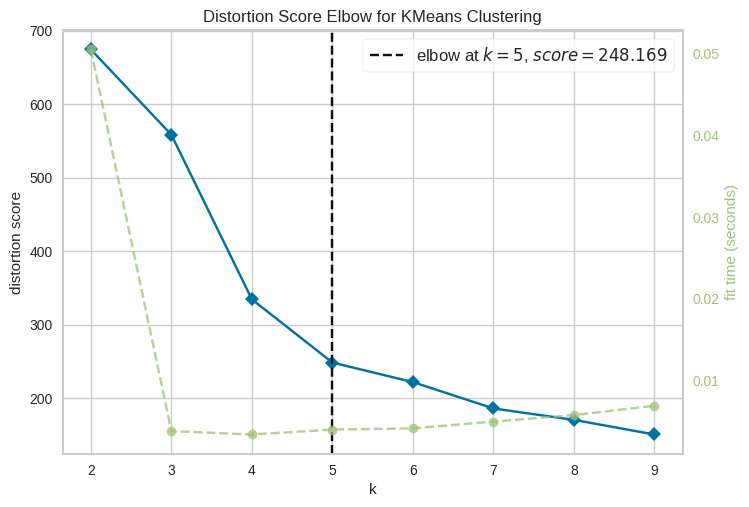

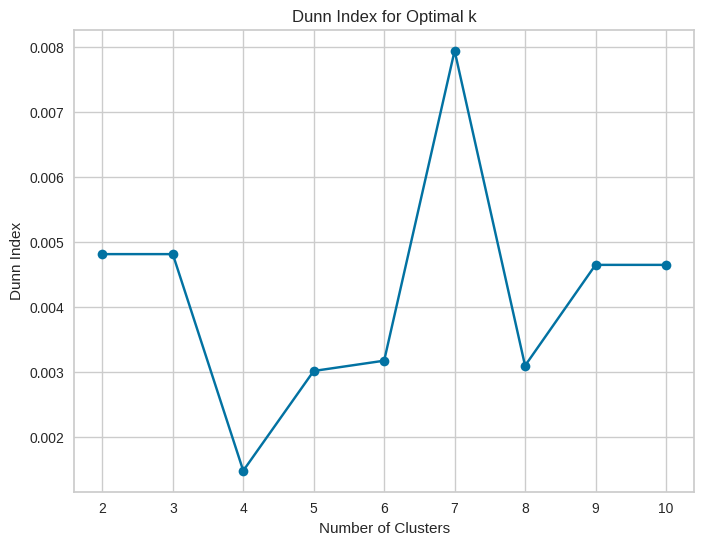

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from yellowbrick.cluster import KElbowVisualizer

# Elbow Method using KElbowVisualizer from Yellowbrick
def elbow_method_visualizer(data):
    cluster_model = KMeans(random_state=42)
    visualizer = KElbowVisualizer(cluster_model, k=(2, 10))  # K dari 2 sampai 10
    visualizer.fit(data)  # Gunakan data PCA yang sudah diproses
    visualizer.show()

# Dunn Index Calculation
def dunn_index(data, labels):
    # Compute pairwise distances between all points
    pairwise_dist = pairwise_distances(data)

    # Compute intra-cluster distances (maximum distance within each cluster)
    intra_cluster_distances = []
    for i in np.unique(labels):
        cluster_points = data[labels == i]
        if len(cluster_points) > 1:
            intra_cluster_distances.append(np.max(pairwise_dist[labels == i][:, labels == i]))
        else:
            intra_cluster_distances.append(0)

    # Compute inter-cluster distances (minimum distance between clusters)
    inter_cluster_distances = []
    for i in range(len(np.unique(labels))):
        for j in range(i + 1, len(np.unique(labels))):
            cluster_i = data[labels == i]
            cluster_j = data[labels == j]
            min_distance = np.min(pairwise_dist[labels == i][:, labels == j])
            inter_cluster_distances.append(min_distance)

    # Dunn Index is the minimum inter-cluster distance divided by the maximum intra-cluster distance
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Set parameters
n_components = 3  # Use PCA transformed data or original data
data = pca_data  # Replace with your transformed data

# 1. Elbow Method Visualization
print("Visualizing the Elbow Method for Optimal Clusters:")
elbow_method_visualizer(data)

# 2. Dunn Index Calculation
n_clusters_list = range(2, 11)  # K values from 2 to 10
dunn_scores = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    dunn_scores.append(dunn_index(data, labels))

# Plot Dunn Index to see which k gives the best value
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_list, dunn_scores, marker='o')
plt.title('Dunn Index for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index')
plt.show()

Berdasarkan grafik ini, jumlah klaster optimal untuk dataset ini adalah 5, karena setelah titik ini, penurunan distorsi skor semakin kecil dan tidak memberikan perbaikan yang signifikan.

In [53]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=22e17cae7801813e5b38297dfacea2a8056d869ed931a111d76adb17b780dc32
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


# Menentukan Model terbaik dari 4 jenis Clustering

In [54]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from minisom import MiniSom  # Self Organizing Map (SOM)

# K-Means Clustering
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_model.fit_predict(pca_data)
kmeans_db_index, kmeans_silhouette = evaluate_clustering(kmeans_labels, pca_data)

# Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo_model.fit_predict(pca_data)
agglo_db_index, agglo_silhouette = evaluate_clustering(agglo_labels, pca_data)

# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(pca_data)
dbscan_db_index, dbscan_silhouette = evaluate_clustering(dbscan_labels, pca_data)

# Self Organizing Map (SOM) Clustering
som = MiniSom(x=10, y=10, input_len=pca_data.shape[1], sigma=1.0, learning_rate=0.5)
som.train(pca_data, 1000)  # Training SOM with 1000 iteration

# Mapping input to the closest node
som_labels = np.array([som.winner(x) for x in pca_data])  # Get SOM labels for each data point
# Flattening the SOM grid to use it for clustering (5 clusters)

# Combine the x and y coordinates of the SOM winner node to get a unique ID for each node
som_labels_flat = np.array([som.winner(x)[0] * 10 + som.winner(x)[1] for x in pca_data])

# Normalize SOM grid values into 5 clusters
# Cluster IDs are assigned based on the SOM node index, dividing into 5 clusters
num_clusters = 3
cluster_ids = np.digitize(som_labels_flat, bins=np.linspace(0, max(som_labels_flat), num_clusters+1)) - 1  # 0-based indexing

# Evaluasi Model

In [55]:
from sklearn.metrics import calinski_harabasz_score

# Menghitung Calinski-Harabasz Index (CHI) untuk setiap model clustering
kmeans_chi = calinski_harabasz_score(pca_data, kmeans_labels)
agglo_chi = calinski_harabasz_score(pca_data, agglo_labels)
dbscan_chi = calinski_harabasz_score(pca_data, dbscan_labels)

# Evaluating the Clustering
som_db_index = davies_bouldin_score(pca_data, cluster_ids)
som_silhouette = silhouette_score(pca_data, cluster_ids)
som_chi = calinski_harabasz_score(pca_data, cluster_ids)

# Output hasil evaluasi
print(f"KMeans - Davies-Bouldin Index: {kmeans_db_index}, Silhouette Score: {kmeans_silhouette}, Calinski-Harabasz Index: {kmeans_chi}")
print(f"Agglomerative Clustering - Davies-Bouldin Index: {agglo_db_index}, Silhouette Score: {agglo_silhouette}, Calinski-Harabasz Index: {agglo_chi}")
print(f"DBSCAN - Davies-Bouldin Index: {dbscan_db_index}, Silhouette Score: {dbscan_silhouette}, Calinski-Harabasz Index: {dbscan_chi}")
print(f"SOM - Davies-Bouldin Index: {som_db_index}, Silhouette Score: {som_silhouette}, Calinski-Harabasz Index: {som_chi}")

KMeans - Davies-Bouldin Index: 0.8039259755159467, Silhouette Score: 0.49200388350680535, Calinski-Harabasz Index: 4756.113311725493
Agglomerative Clustering - Davies-Bouldin Index: 0.8074317409403593, Silhouette Score: 0.4781551346750757, Calinski-Harabasz Index: 4348.487653834855
DBSCAN - Davies-Bouldin Index: 0.6576414452592438, Silhouette Score: 0.18673206164076597, Calinski-Harabasz Index: 152.19217306471896
SOM - Davies-Bouldin Index: 6.771650154455176, Silhouette Score: -0.14798220279069277, Calinski-Harabasz Index: 164.0078164435594


Secara keseluruhan, KMeans adalah algoritma klasterisasi yang paling efektif berdasarkan hasil evaluasi, dengan nilai tinggi pada Calinski-Harabasz Index dan Silhouette Score. Agglomerative Clustering juga memberikan hasil yang cukup baik, namun sedikit lebih rendah dibandingkan KMeans. DBSCAN menunjukkan pemisahan yang baik dalam hal Davies-Bouldin Index, namun tidak cukup baik dalam Silhouette Score dan Calinski-Harabasz Index, sementara SOM memberikan hasil yang paling buruk di antara semua algoritma yang diuji. Selanjutnya akan dilakukan Hyperparameter Tunning untuk DBSCAN

KMeans secara keseluruhan menghasilkan klaster yang lebih terpisah dan lebih padat, seperti yang terlihat dari nilai Davies-Bouldin Index, Silhouette Score, dan Calinski-Harabasz Index yang lebih baik dibandingkan dengan DBSCAN. Jadi Motode terbaik adalah motode K-Means dengan 5 Cluster

# Visualisasi PCA

In [56]:
# Menentukan jumlah klaster secara manual (misalnya 4 klaster)
n_clusters = 5  # Tentukan jumlah klaster yang diinginkan

# Inisialisasi KMeans dengan jumlah klaster yang telah ditentukan
model = KMeans(n_clusters=n_clusters, random_state=42)

# Fit dan prediksi labels menggunakan KMeans
labels = model.fit_predict(pca_data)  # Gunakan data hasil PCA sebagai input

# Mengubah label dari 0-based menjadi 1-based
labels = labels + 1

# Menampilkan labels yang diperoleh
print(f'Labels: {labels}')

Labels: [1 1 3 ... 1 1 1]


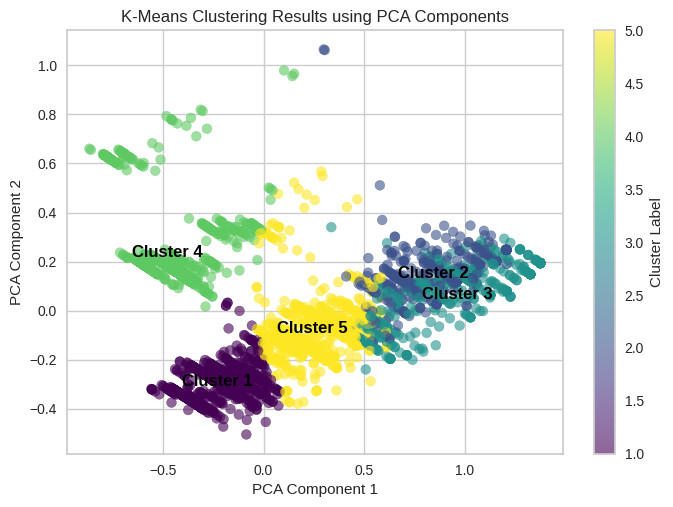

In [57]:
# Menampilkan plot hasil clustering menggunakan PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)

# Menghitung titik pusat (centroid) dari masing-masing cluster
centroids = np.array([pca_data[labels == i].mean(axis=0) for i in range(1, n_clusters+1)])

# Menambahkan teks "Cluster X" pada centroid setiap cluster
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu
plt.title('K-Means Clustering Results using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Menambahkan color bar untuk menunjukkan label cluster
plt.colorbar(label='Cluster Label')

# Menampilkan plot
plt.show()

Visualisasi ini menunjukkan hasil klasterisasi yang cukup baik, dengan pemisahan yang jelas antara sebagian besar klaster. Hal ini menandakan bahwa algoritma klasterisasi KMeans berhasil dalam mengidentifikasi struktur yang mendalam dalam data.
Tumpang tindih antar beberapa klaster (seperti Cluster 2 dan Cluster 3) mungkin menunjukkan bahwa beberapa data memiliki karakteristik yang mirip.

Agglomerative Clustering Labels: [2 2 1 ... 2 2 2]


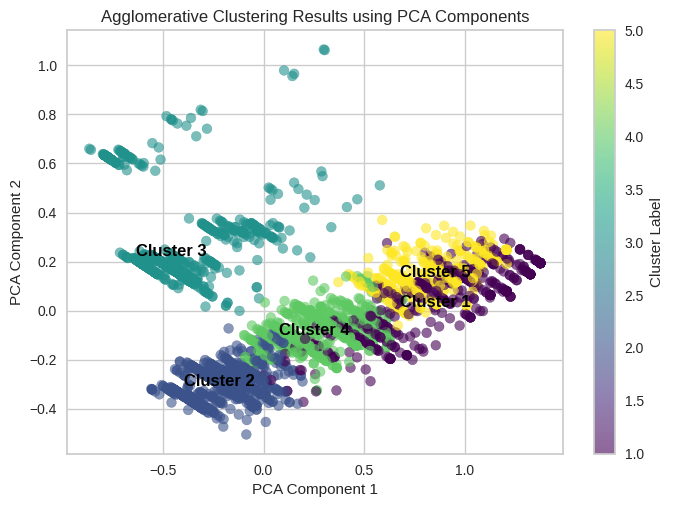

In [58]:
# Menentukan jumlah klaster untuk Agglomerative Clustering (misalnya 5 klaster)
agglo_n_clusters = 5

# Inisialisasi Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=agglo_n_clusters)

# Fit dan prediksi labels menggunakan Agglomerative Clustering
agglo_labels = agglo_model.fit_predict(pca_data)

# Mengubah label dari 0-based menjadi 1-based
agglo_labels = agglo_labels + 1

# Menampilkan labels yang diperoleh
print(f'Agglomerative Clustering Labels: {agglo_labels}')

# Menampilkan plot hasil clustering menggunakan PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agglo_labels, cmap='viridis', s=50, alpha=0.6)

# Menghitung titik pusat (centroid) dari masing-masing cluster
agglo_centroids = np.array([pca_data[agglo_labels == i].mean(axis=0) for i in range(1, agglo_n_clusters+1)])

# Menambahkan teks "Cluster X" pada centroid setiap cluster
for i, centroid in enumerate(agglo_centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu
plt.title('Agglomerative Clustering Results using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Menambahkan color bar untuk menunjukkan label cluster
plt.colorbar(label='Cluster Label')

# Menampilkan plot
plt.show()

DBSCAN Labels: [0 0 0 ... 0 0 0]


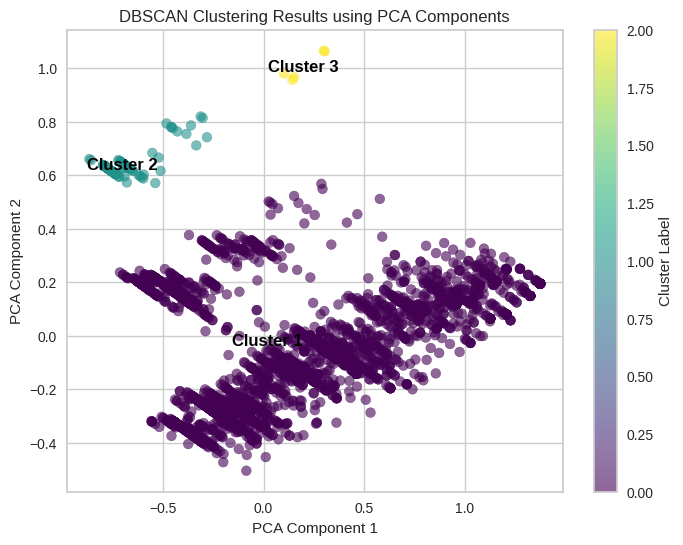

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Fungsi untuk mengevaluasi klasterisasi
def evaluate_clustering(labels, data):
    davies_bouldin = davies_bouldin_score(data, labels)
    silhouette = silhouette_score(data, labels)
    return davies_bouldin, silhouette

# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(pca_data)

# Menghitung evaluasi klasterisasi
dbscan_db_index, dbscan_silhouette = evaluate_clustering(dbscan_labels, pca_data)

# Mengubah label -1 (noise) menjadi nilai yang lebih mudah dibaca (misalnya 0)
dbscan_labels[dbscan_labels == -1] = 0

# Menampilkan labels yang diperoleh
print(f'DBSCAN Labels: {dbscan_labels}')

# Menampilkan plot hasil clustering menggunakan PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.6)

# Menghitung titik pusat (centroid) dari masing-masing cluster
centroids = np.array([pca_data[dbscan_labels == i].mean(axis=0) for i in np.unique(dbscan_labels)])

# Menambahkan teks "Cluster X" pada centroid setiap cluster
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu
plt.title('DBSCAN Clustering Results using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Menambahkan color bar untuk menunjukkan label cluster
plt.colorbar(label='Cluster Label')

# Menampilkan plot
plt.show()

SOM Labels (Cluster IDs): [3 4 0 ... 3 4 4]


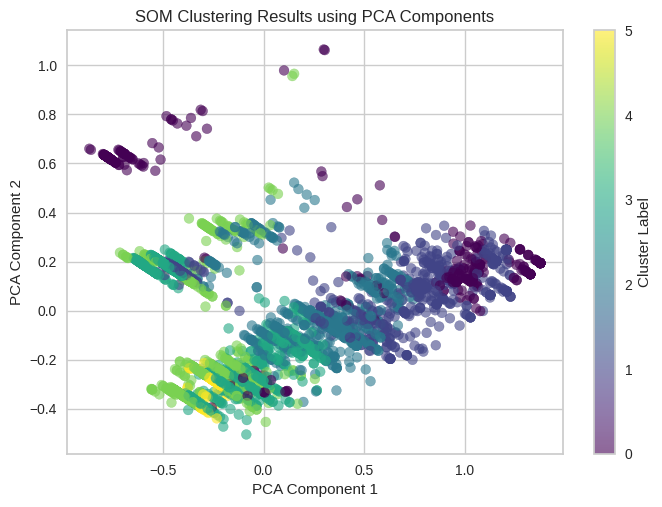

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Inisialisasi Self Organizing Map (SOM) dengan ukuran grid 10x10
som = MiniSom(x=10, y=10, input_len=pca_data.shape[1], sigma=1.0, learning_rate=0.5)

# Latih SOM dengan data PCA
som.train(pca_data, 1000)  # Training SOM dengan 1000 iterasi

# Menentukan label berdasarkan node pemenang SOM
som_labels = np.array([som.winner(x) for x in pca_data])  # Mendapatkan koordinat pemenang node
som_labels_flat = np.array([som.winner(x)[0] * 10 + som.winner(x)[1] for x in pca_data])  # Flatten grid menjadi label 1D

# Membagi hasil grid SOM menjadi 5 cluster
num_clusters = 5
cluster_ids = np.digitize(som_labels_flat, bins=np.linspace(0, max(som_labels_flat), num_clusters + 1)) - 1  # 0-based indexing

# Menampilkan hasil label
print(f"SOM Labels (Cluster IDs): {cluster_ids}")

# Visualisasi hasil clustering menggunakan PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_ids, cmap='viridis', s=50, alpha=0.6)

# Menambahkan judul dan label sumbu
plt.title('SOM Clustering Results using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Menambahkan color bar untuk menunjukkan label cluster
plt.colorbar(label='Cluster Label')

# Menampilkan plot
plt.show()

# Hyperparameter Tunning DBSCAN

Best Result:
eps: 0.3, min_samples: 2
Davies-Bouldin Index: 1.2883752747679458
Silhouette Score: 0.18924192415866764
Calinski-Harabasz Index: 242.56163383524884
--------------------------------------------------


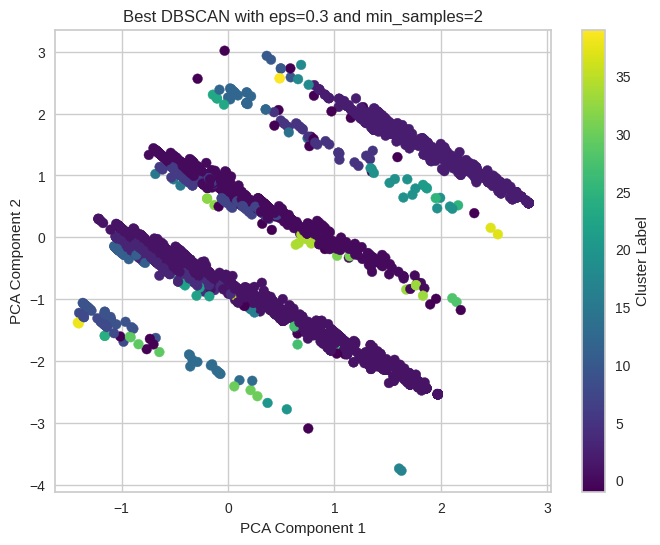

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fungsi untuk mengevaluasi klasterisasi
def evaluate_clustering(labels, data):
    davies_bouldin = davies_bouldin_score(data, labels)
    silhouette = silhouette_score(data, labels)
    return davies_bouldin, silhouette

# Hyperparameter tuning DBSCAN (mencoba beberapa kombinasi nilai eps dan min_samples)
eps_values = [0.1, 0.3, 0.5, 0.7, 1.0]   # Penambahan nilai eps yang lebih bervariasi
min_samples_values = [2, 3, 5, 7, 10]   # Penambahan variasi untuk min_samples

# Variabel untuk menyimpan hasil evaluasi
best_result = None
best_davies_bouldin = np.inf  # Memulai dengan nilai paling buruk untuk Davies-Bouldin
best_silhouette = -1  # Memulai dengan nilai paling buruk untuk Silhouette
best_calinski = -1  # Memulai dengan nilai paling buruk untuk Calinski-Harabasz

# Normalisasi data terlebih dahulu
data_scaled = StandardScaler().fit_transform(data)

# Loop untuk mencoba kombinasi eps dan min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN dengan parameter yang diuji
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(data_scaled)

        # Cek jumlah label (termasuk noise -1)
        unique_labels, counts = np.unique(dbscan_labels, return_counts=True)

        # Menghindari masalah dengan noise (-1) yang dihasilkan oleh DBSCAN
        if len(unique_labels) > 1:  # Pastikan ada lebih dari satu klaster
            dbscan_db_index, dbscan_silhouette = evaluate_clustering(dbscan_labels, data_scaled)
            dbscan_chi = calinski_harabasz_score(data_scaled, dbscan_labels)

            # Memilih hasil terbaik berdasarkan metrik evaluasi
            if dbscan_db_index < best_davies_bouldin and dbscan_silhouette > best_silhouette and dbscan_chi > best_calinski:
                best_result = {
                    "eps": eps,
                    "min_samples": min_samples,
                    "Davies-Bouldin Index": dbscan_db_index,
                    "Silhouette Score": dbscan_silhouette,
                    "Calinski-Harabasz Index": dbscan_chi
                }

                # Memperbarui nilai terbaik untuk evaluasi
                best_davies_bouldin = dbscan_db_index
                best_silhouette = dbscan_silhouette
                best_calinski = dbscan_chi

# Menampilkan hasil terbaik
if best_result:
    print(f"Best Result:")
    print(f"eps: {best_result['eps']}, min_samples: {best_result['min_samples']}")
    print(f"Davies-Bouldin Index: {best_result['Davies-Bouldin Index']}")
    print(f"Silhouette Score: {best_result['Silhouette Score']}")
    print(f"Calinski-Harabasz Index: {best_result['Calinski-Harabasz Index']}")
    print("-" * 50)

    # Mengaplikasikan PCA untuk mereduksi dimensi menjadi 2
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)

    # Visualisasi klaster terbaik dengan PCA
    dbscan_model_best = DBSCAN(eps=best_result['eps'], min_samples=best_result['min_samples'])
    dbscan_labels_best = dbscan_model_best.fit_predict(data_scaled)

    plt.figure(figsize=(8,6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels_best, cmap='viridis')
    plt.title(f"Best DBSCAN with eps={best_result['eps']} and min_samples={best_result['min_samples']}")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()
else:
    print("No valid clustering results.")


Best Result:
eps: 0.3, min_samples: 2
Davies-Bouldin Index: 1.2883752747679458
Silhouette Score: 0.18924192415866764
Calinski-Harabasz Index: 242.56163383524884
--------------------------------------------------


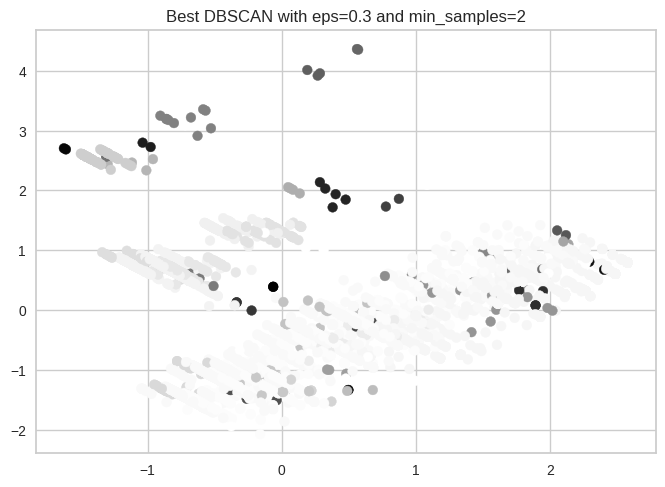

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Fungsi untuk mengevaluasi klasterisasi
def evaluate_clustering(labels, data):
    davies_bouldin = davies_bouldin_score(data, labels)
    silhouette = silhouette_score(data, labels)
    return davies_bouldin, silhouette

# Hyperparameter tuning DBSCAN (mencoba beberapa kombinasi nilai eps dan min_samples)
eps_values = [0.1, 0.3, 0.5, 0.7, 1.0]   # Penambahan nilai eps yang lebih bervariasi
min_samples_values = [2, 3, 5, 7, 10]   # Penambahan variasi untuk min_samples

# Variabel untuk menyimpan hasil evaluasi
best_result = None
best_davies_bouldin = np.inf  # Memulai dengan nilai paling buruk untuk Davies-Bouldin
best_silhouette = -1  # Memulai dengan nilai paling buruk untuk Silhouette
best_calinski = -1  # Memulai dengan nilai paling buruk untuk Calinski-Harabasz

# Normalisasi data terlebih dahulu
data_scaled = StandardScaler().fit_transform(data)

# Loop untuk mencoba kombinasi eps dan min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN dengan parameter yang diuji
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(data_scaled)

        # Cek jumlah label (termasuk noise -1)
        unique_labels, counts = np.unique(dbscan_labels, return_counts=True)

        # Menghindari masalah dengan noise (-1) yang dihasilkan oleh DBSCAN
        if len(unique_labels) > 1:  # Pastikan ada lebih dari satu klaster
            dbscan_db_index, dbscan_silhouette = evaluate_clustering(dbscan_labels, data_scaled)
            dbscan_chi = calinski_harabasz_score(data_scaled, dbscan_labels)

            # Memilih hasil terbaik berdasarkan metrik evaluasi
            if dbscan_db_index < best_davies_bouldin and dbscan_silhouette > best_silhouette and dbscan_chi > best_calinski:
                best_result = {
                    "eps": eps,
                    "min_samples": min_samples,
                    "Davies-Bouldin Index": dbscan_db_index,
                    "Silhouette Score": dbscan_silhouette,
                    "Calinski-Harabasz Index": dbscan_chi
                }

                # Memperbarui nilai terbaik untuk evaluasi
                best_davies_bouldin = dbscan_db_index
                best_silhouette = dbscan_silhouette
                best_calinski = dbscan_chi

# Menampilkan hasil terbaik
if best_result:
    print(f"Best Result:")
    print(f"eps: {best_result['eps']}, min_samples: {best_result['min_samples']}")
    print(f"Davies-Bouldin Index: {best_result['Davies-Bouldin Index']}")
    print(f"Silhouette Score: {best_result['Silhouette Score']}")
    print(f"Calinski-Harabasz Index: {best_result['Calinski-Harabasz Index']}")
    print("-" * 50)

    # Visualisasi klaster terbaik
    dbscan_model_best = DBSCAN(eps=best_result['eps'], min_samples=best_result['min_samples'])
    dbscan_labels_best = dbscan_model_best.fit_predict(data_scaled)
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels_best)
    plt.title(f"Best DBSCAN with eps={best_result['eps']} and min_samples={best_result['min_samples']}")
    plt.show()
else:
    print("No valid clustering results.")

Best Result:
eps: 0.3, min_samples: 2
Davies-Bouldin Index: 1.2883752747679458
Silhouette Score: 0.18924192415866764
Calinski-Harabasz Index: 242.56163383524884
--------------------------------------------------


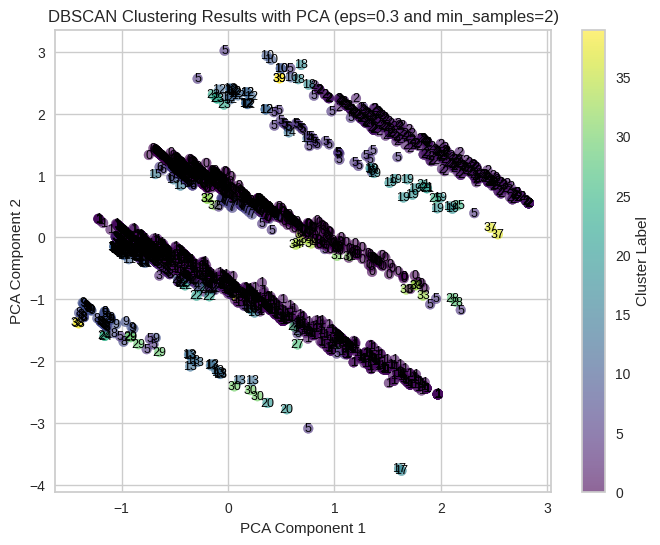

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fungsi untuk mengevaluasi klasterisasi
def evaluate_clustering(labels, data):
    davies_bouldin = davies_bouldin_score(data, labels)
    silhouette = silhouette_score(data, labels)
    return davies_bouldin, silhouette

# Hyperparameter tuning DBSCAN (mencoba beberapa kombinasi nilai eps dan min_samples)
eps_values = [0.1, 0.3, 0.5, 0.7, 1.0]   # Penambahan nilai eps yang lebih bervariasi
min_samples_values = [2, 3, 5, 7, 10]   # Penambahan variasi untuk min_samples

# Variabel untuk menyimpan hasil evaluasi
best_result = None
best_davies_bouldin = np.inf  # Memulai dengan nilai paling buruk untuk Davies-Bouldin
best_silhouette = -1  # Memulai dengan nilai paling buruk untuk Silhouette
best_calinski = -1  # Memulai dengan nilai paling buruk untuk Calinski-Harabasz

# Normalisasi data terlebih dahulu
data_scaled = StandardScaler().fit_transform(data)

# Loop untuk mencoba kombinasi eps dan min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN dengan parameter yang diuji
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(data_scaled)

        # Cek jumlah label (termasuk noise -1)
        unique_labels, counts = np.unique(dbscan_labels, return_counts=True)

        # Menghindari masalah dengan noise (-1) yang dihasilkan oleh DBSCAN
        if len(unique_labels) > 1:  # Pastikan ada lebih dari satu klaster
            dbscan_db_index, dbscan_silhouette = evaluate_clustering(dbscan_labels, data_scaled)
            dbscan_chi = calinski_harabasz_score(data_scaled, dbscan_labels)

            # Memilih hasil terbaik berdasarkan metrik evaluasi
            if dbscan_db_index < best_davies_bouldin and dbscan_silhouette > best_silhouette and dbscan_chi > best_calinski:
                best_result = {
                    "eps": eps,
                    "min_samples": min_samples,
                    "Davies-Bouldin Index": dbscan_db_index,
                    "Silhouette Score": dbscan_silhouette,
                    "Calinski-Harabasz Index": dbscan_chi
                }

                # Memperbarui nilai terbaik untuk evaluasi
                best_davies_bouldin = dbscan_db_index
                best_silhouette = dbscan_silhouette
                best_calinski = dbscan_chi

# Menampilkan hasil terbaik
if best_result:
    print(f"Best Result:")
    print(f"eps: {best_result['eps']}, min_samples: {best_result['min_samples']}")
    print(f"Davies-Bouldin Index: {best_result['Davies-Bouldin Index']}")
    print(f"Silhouette Score: {best_result['Silhouette Score']}")
    print(f"Calinski-Harabasz Index: {best_result['Calinski-Harabasz Index']}")
    print("-" * 50)

    # Visualisasi klaster terbaik
    dbscan_model_best = DBSCAN(eps=best_result['eps'], min_samples=best_result['min_samples'])
    dbscan_labels_best = dbscan_model_best.fit_predict(data_scaled)

    # Menggunakan PCA untuk mereduksi dimensi data ke dua komponen untuk visualisasi
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data_scaled)

    # Visualisasi hasil clustering menggunakan PCA (2D)
    plt.figure(figsize=(8, 6))

    # Membatasi 5 klaster
    cluster_labels = dbscan_labels_best
    cluster_labels[cluster_labels == -1] = 5  # Mengganti label noise dengan label klaster ke-5 untuk visualisasi

    # Visualisasi dengan 5 klaster dan label yang ditampilkan
    scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(f"DBSCAN Clustering Results with PCA (eps={best_result['eps']} and min_samples={best_result['min_samples']})")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, label='Cluster Label')

    # Menambahkan label untuk setiap titik
    for i, label in enumerate(cluster_labels):
        plt.text(pca_data[i, 0], pca_data[i, 1], str(label), fontsize=9, color='black', ha='center', va='center')

    plt.show()

else:
    print("No valid clustering results.")

# Profilisasi Cluster


In [64]:
import pandas as pd

# Buat DataFrame untuk menyimpan hasil clustering dalam bentuk awal (standardized)
df_clustered = pd.DataFrame(transformed_data, columns=feature_names)  # Data sebelum inverse transform
df_clustered['cluster'] = labels  # Tambahkan hasil clustering

# Hitung rata-rata per klaster
profiling_result = df_clustered.groupby('cluster').mean()

# Tampilkan hasil
profiling_result

,price,accommodates,bedrooms,beds,guests_included,room_type_encoded
cluster,,,,,,
1,0.381507,0.239536,0.204155,0.019512,0.394632,0.002258
2,0.740261,0.822339,0.718055,0.853826,0.320392,0.007916
3,0.751911,0.821629,0.728331,0.772472,0.989567,0.002809
4,0.206792,0.157453,0.285714,0.037236,0.332288,0.546748
5,0.471383,0.494191,0.391038,0.423861,0.464381,0.024129


In [65]:
import pandas as pd

# Buat DataFrame untuk menyimpan hasil clustering dalam bentuk awal (standardized)
df_clustered = pd.DataFrame(listings_selected_copy, columns=feature_names)  # Data sebelum inverse transform
df_clustered['cluster'] = labels  # Tambahkan hasil clustering

# Hitung rata-rata per klaster
profiling_result = df_clustered.groupby('cluster').mean()

# Tampilkan hasil
profiling_result

,price,accommodates,bedrooms,beds,guests_included,room_type_encoded
cluster,,,,,,
1,112.515357,2.437218,0.714544,1.048780,1.381210,1.004517
2,199.513193,5.934037,2.513193,3.134565,1.121372,1.015831
3,202.338483,5.929775,2.549157,2.931180,3.463483,1.005618
4,70.147154,1.944715,1.000000,1.093089,1.163008,2.093496
5,134.310322,3.965147,1.368633,2.059651,1.625335,1.048257


1. Cluster 1: Budget Single (Harga Terjangkau untuk 1-2 Orang)
* Price: $113 per malam (Harga sewa terjangkau)
* Accommodates: 2 orang
* Bedrooms: 1 kamar tidur
* Beds: 1 tempat tidur
* Guests Included: 1 tamu sudah termasuk dalam harga
* Room Type: Entire Home/Apt (seluruh rumah atau apartemen disewakan)

Interpretasi:
Cluster ini adalah pilihan yang ideal bagi individu atau pasangan yang mencari harga sewa terjangkau dan lebih suka memiliki privasi penuh dengan menyewa seluruh rumah atau apartemen. Dengan kapasitas 2 orang dan hanya 1 kamar tidur, properti ini menawarkan kenyamanan sederhana.

2. Cluster 2: Spacious Family Home (Rumah Keluarga Luas untuk 6 Orang)
* Price: $200 per malam
* Accommodates: 6 orang
* Bedrooms: 3 kamar tidur
* Beds: 3 tempat tidur
* Guests Included: 1 tamu sudah termasuk dalam harga
* Room Type: Entire Home/Apt (seluruh rumah atau apartemen disewakan)

Interpretasi:
Cluster ini menunjukkan properti dengan ruang yang lebih besar, ideal untuk keluarga atau kelompok yang lebih besar (hingga 6 orang). Dengan 3 kamar tidur dan 3 tempat tidur, harga yang lebih tinggi ($200) sebanding dengan ruang yang lebih luas dan kenyamanan yang ditawarkan. Tipe Entire Home/Apt memberikan kebebasan penuh bagi penyewa.

3. Cluster 3: Luxury Group Stay (Akomodasi Mewah untuk Kelompok)
* Price: $202 per malam
* Accommodates: 6 orang
* Bedrooms: 3 kamar tidur
* Beds: 3 tempat tidur
* Guests Included: 3 tamu sudah termasuk dalam harga
* Room Type: Entire Home/Apt (seluruh rumah atau apartemen disewakan)

Interpretasi:
Cluster ini hampir serupa dengan Cluster 2 dalam hal kapasitas dan harga, namun sedikit lebih mahal ($202) dan memiliki lebih banyak tamu yang sudah termasuk dalam harga sewa (hingga 3 tamu). Ini menunjukkan bahwa properti ini sangat cocok untuk kelompok atau keluarga yang lebih besar, dengan 3 kamar tidur dan 3 tempat tidur yang luas. Tipe Entire Home/Apt memberi penyewa ruang dan privasi penuh.

4. Cluster 4: Economy Shared Room (Akomodasi Ekonomis dengan Kamar Bersama)
* Price: $70 per malam (Harga sangat terjangkau)
* Accommodates: 2 orang
* Bedrooms: 1 kamar tidur
* Beds: 1 tempat tidur
* Guests Included: 1 tamu sudah termasuk dalam harga
* Room Type: Shared Room (kamar tidur bersama, berbagi dengan tamu lain)

Interpretasi:
Cluster ini menawarkan harga sewa yang sangat terjangkau ($70), cocok untuk individu atau pasangan yang ingin menghemat biaya. Dengan 1 kamar tidur dan 1 tempat tidur, namun penyewa berbagi kamar dengan tamu lain, memberikan pilihan yang lebih ekonomis tetapi dengan kenyamanan terbatas dibandingkan dengan tipe Entire Home/Apt.

5. Cluster 5: Mid-Range Private Room (Kamar Pribadi untuk 4 Orang dengan Harga Menengah)
* Price: $134 per malam
* Accommodates: 4 orang
* Bedrooms: 2 kamar tidur
* Beds: 2 tempat tidur
* Guests Included: 2 tamu sudah termasuk dalam harga
* Room Type: Private Room (kamar pribadi di rumah/apartemen yang dibagi dengan penghuni lain)

Interpretasi:
Cluster ini menunjukkan pilihan yang lebih baik untuk keluarga kecil atau grup teman (hingga 4 orang) dengan harga sewa moderat ($134). Dengan 2 kamar tidur dan 2 tempat tidur, serta tipe Private Room, properti ini menawarkan privasi yang lebih banyak dibandingkan dengan Shared Room, meskipun masih berbagi ruang dengan penghuni lain.

In [66]:
# Menambahkan label klaster ke data
transformed_data['label'] = labels  # Pastikan 'labels' adalah hasil clustering

# Menggunakan PCA untuk mengurangi dimensi data menjadi 5 komponen utama
pca = PCA(n_components=5)  # Menggunakan 5 komponen utama untuk PCA

# Menggunakan PCA untuk mengurangi dimensi data menjadi 5 komponen utama
principal_components = pca.fit_transform(transformed_data.drop('label', axis=1))  # Menghilangkan kolom 'label'

# Membuat DataFrame dengan komponen utama
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Menambahkan kolom 'label' ke DataFrame hasil PCA
principal_df['label'] = transformed_data['label']

# Menampilkan hasil DataFrame PCA
principal_df

,PC1,PC2,PC3,PC4,PC5,label
0,-0.085660,-0.238306,0.172553,-0.079717,0.156243,1
1,-0.049504,-0.274139,-0.151585,0.108586,0.056277,1
2,1.374992,0.194154,0.252195,0.210056,0.034641,3
3,-0.075242,-0.196533,-0.153068,-0.304833,-0.242745,1
4,1.126718,0.064022,0.293950,0.277309,-0.020547,3
...,...,...,...,...,...,...
3813,0.958661,0.117649,-0.393528,0.239320,0.025827,2
3814,0.206223,-0.114965,0.393217,-0.267116,-0.002792,5
3815,-0.236793,-0.274951,0.176642,-0.007135,0.095580,1
3816,-0.392963,-0.349953,-0.088379,-0.100386,-0.112534,1


In [67]:
listings_selected_copy['cluster'] = labels
listings_selected_copy

,price,accommodates,bedrooms,beds,guests_included,room_type_encoded,cluster
0,85.0,4.0,1.0,1.0,2.0,1,1
1,150.0,4.0,1.0,1.0,1.0,1,1
2,262.5,7.0,3.5,3.5,3.5,1,3
3,100.0,3.0,0.0,2.0,1.0,1,1
4,262.5,6.0,3.0,3.0,3.5,1,3
...,...,...,...,...,...,...,...
3813,262.5,6.0,3.0,3.0,1.0,1,2
3814,79.0,4.0,1.0,2.0,3.0,1,5
3815,93.0,2.0,1.0,1.0,2.0,1,1
3816,99.0,2.0,0.0,1.0,1.0,1,1
